In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import scipy.stats as stats
from statsmodels.stats.weightstats import ttest_ind
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import statsmodels.api as sm
import tensorflow as tf
from tensorflow import keras
import os 
import cv2
from tensorflow.keras import datasets, layers, models
from keras.datasets import fashion_mnist
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import shutil
import random
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#%matplotlib inline

pd.options.display.float_format = '{:.5f}'.format

In [228]:
#Read in stock CSV file exports from Yahoo Finance
AAPL = pd.read_csv('C:\MIS581\csv files\AAPL.csv',parse_dates=[0])
AMZN = pd.read_csv('C:\MIS581\csv files\AMZN.csv',parse_dates=[0])
BRK = pd.read_csv('C:\MIS581\csv files\BRK.csv',parse_dates=[0])
FB = pd.read_csv('C:\MIS581\csv files\FB.csv',parse_dates=[0])
GOOG = pd.read_csv('C:\MIS581\csv files\GOOG.csv',parse_dates=[0])
MA = pd.read_csv('C:\MIS581\csv files\MA.csv',parse_dates=[0])
MSFT = pd.read_csv('C:\MIS581\csv files\MSFT.csv',parse_dates=[0])
PG = pd.read_csv('C:\MIS581\csv files\PG.csv',parse_dates=[0])
TSLA = pd.read_csv('C:\MIS581\csv files\TSLA.csv',parse_dates=[0])
WMT = pd.read_csv('C:\MIS581\csv files\WMT.csv',parse_dates=[0])

#Adding asset and class string fields
Class = 'Stock'
AAPL['Asset']='AAPL'
AAPL['Class']=Class
AMZN['Asset']='AMZN'
AMZN['Class']=Class
BRK['Asset']='BRK'
BRK['Class']=Class
FB['Asset']='FB'
FB['Class']=Class
GOOG['Asset']='GOOG'
GOOG['Class']=Class
MA['Asset']='MA'
MA['Class']=Class
MSFT['Asset']='MSFT'
MSFT['Class']=Class
PG['Asset']='PG'
PG['Class']=Class
TSLA['Asset']='TSLA'
TSLA['Class']=Class
WMT['Asset']='WMT'
WMT['Class']=Class

stock = pd.concat([AAPL,AMZN,BRK,FB,GOOG,MA,MSFT,PG,TSLA,WMT])
#stock.to_csv('tester.csv')

In [229]:
#Read in stock index CSV file exports from Yahoo Finance
IXCO = pd.read_csv('C:\MIS581\csv files\^IXCO.csv',parse_dates=[0])
IXIC = pd.read_csv('C:\MIS581\csv files\^IXIC.csv',parse_dates=[0])
MID = pd.read_csv('C:\MIS581\csv files\^MID.csv',parse_dates=[0])
NYA = pd.read_csv('C:\MIS581\csv files\^NYA.csv',parse_dates=[0])
OEX = pd.read_csv('C:\MIS581\csv files\^OEX.csv',parse_dates=[0])
RUT = pd.read_csv('C:\MIS581\csv files\^RUT.csv',parse_dates=[0])
SOX = pd.read_csv('C:\MIS581\csv files\^SOX.csv',parse_dates=[0])
XAU = pd.read_csv('C:\MIS581\csv files\^XAU.csv',parse_dates=[0])
DIA = pd.read_csv('C:\MIS581\csv files\DIA.csv',parse_dates=[0])
VOO = pd.read_csv('C:\MIS581\csv files\VOO.csv',parse_dates=[0])

#Adding asset and class string fields
Class = 'Index'
IXCO['Asset']='IXCO'
IXCO['Class']=Class
IXIC['Asset']='IXIC'
IXIC['Class']=Class
MID['Asset']='MID'
MID['Class']=Class
NYA['Asset']='NYA'
NYA['Class']=Class
OEX['Asset']='OEX'
OEX['Class']=Class
RUT['Asset']='RUT'
RUT['Class']=Class
SOX['Asset']='SOX'
SOX['Class']=Class
XAU['Asset']='XAU'
XAU['Class']=Class
DIA['Asset']='DIA'
DIA['Class']=Class
VOO['Asset']='VOO'
VOO['Class']=Class

index = pd.concat([IXCO,IXIC,MID,NYA,OEX,RUT,SOX,XAU,DIA,VOO])

In [230]:
#Read in crypto CSV file exports from Yahoo Finance
ADA = pd.read_csv('C:\MIS581\csv files\ADA-USD.csv',parse_dates=[0])
AVAX = pd.read_csv('C:\MIS581\csv files\AVAX-USD.csv',parse_dates=[0])
BNB = pd.read_csv('C:\MIS581\csv files\BNB-USD.csv',parse_dates=[0])
BTC = pd.read_csv('C:\MIS581\csv files\BTC-USD.csv',parse_dates=[0])
DOGE = pd.read_csv('C:\MIS581\csv files\DOGE-USD.csv',parse_dates=[0])
ETH = pd.read_csv('C:\MIS581\csv files\ETH-USD.csv',parse_dates=[0])
LINK = pd.read_csv('C:\MIS581\csv files\LINK-USD.csv',parse_dates=[0])
LUNA = pd.read_csv('C:\MIS581\csv files\LUNA1-USD.csv',parse_dates=[0])
MATIC = pd.read_csv('C:\MIS581\csv files\MATIC-USD.csv',parse_dates=[0])
SOL = pd.read_csv('C:\MIS581\csv files\SOL-USD.csv',parse_dates=[0])

#Adding asset and class string fields
Class = 'Crypto'

ADA['Asset']='ADA'
ADA['Class']=Class
AVAX['Asset']='AVAX'
AVAX['Class']=Class
BNB['Asset']='BNB'
BNB['Class']=Class
BTC['Asset']='BTC'
BTC['Class']=Class
DOGE['Asset']='DOGE'
DOGE['Class']=Class
ETH['Asset']='ETH'
ETH['Class']=Class
LINK['Asset']='LINK'
LINK['Class']=Class
LUNA['Asset']='LUNA'
LUNA['Class']=Class
MATIC['Asset']='MATIC'
MATIC['Class']=Class
SOL['Asset']='SOL'
SOL['Class']=Class

crypto = pd.concat([ADA, AVAX, BNB, BTC, DOGE, ETH, LINK, LUNA, MATIC, SOL])

In [231]:
alldata = pd.concat([stock,index,crypto])

#Issue with the exported data sets duplicating some records coming out of Yahoo Finance
alldata = alldata.drop_duplicates(subset=['Date', 'Asset'])

#Limit all data to 2010 and later
bool_series = alldata['Date'] >='2010-01-01'
alldata = alldata[bool_series]

#alldata is used for the 1st section (moving average crossover)
#alldata2 is used for the 2nd section (price/volume trend confirmation)
#alldata3 is used for the 3rd section (chart patterns)
alldata2 = alldata.copy()

In [232]:
#print(alldata.iloc[0:4,0:4])

#Add in prior close prices
alldata['Close1']= alldata['Close'].shift(periods=1)
alldata['Close2']= alldata['Close'].shift(periods=2)
alldata['Close3']= alldata['Close'].shift(periods=3)
alldata['Close4']= alldata['Close'].shift(periods=4)
alldata['Close5']= alldata['Close'].shift(periods=5)
alldata['Close6']= alldata['Close'].shift(periods=6)
alldata['Close7']= alldata['Close'].shift(periods=7)
alldata['Close8']= alldata['Close'].shift(periods=8)
alldata['Close9']= alldata['Close'].shift(periods=9)
alldata['Close10']= alldata['Close'].shift(periods=10)
alldata['Close11']= alldata['Close'].shift(periods=11)
alldata['Close12']= alldata['Close'].shift(periods=12)
alldata['Close13']= alldata['Close'].shift(periods=13)
alldata['Close14']= alldata['Close'].shift(periods=14)
alldata['Close15']= alldata['Close'].shift(periods=15)
alldata['Close16']= alldata['Close'].shift(periods=16)
alldata['Close17']= alldata['Close'].shift(periods=17)
alldata['Close18']= alldata['Close'].shift(periods=18)
alldata['Close19']= alldata['Close'].shift(periods=19)
alldata['Close20']= alldata['Close'].shift(periods=20)
alldata['Close21']= alldata['Close'].shift(periods=21)
alldata['Close22']= alldata['Close'].shift(periods=22)
alldata['Close23']= alldata['Close'].shift(periods=23)
alldata['Close24']= alldata['Close'].shift(periods=24)
alldata['Close25']= alldata['Close'].shift(periods=25)
alldata['Close26']= alldata['Close'].shift(periods=26)
alldata['Close27']= alldata['Close'].shift(periods=27)
alldata['Close28']= alldata['Close'].shift(periods=28)
alldata['Close29']= alldata['Close'].shift(periods=29)
alldata['Close30']= alldata['Close'].shift(periods=30)
alldata['Close31']= alldata['Close'].shift(periods=31)
alldata['Close32']= alldata['Close'].shift(periods=32)
alldata['Close33']= alldata['Close'].shift(periods=33)
alldata['Close34']= alldata['Close'].shift(periods=34)
alldata['Close35']= alldata['Close'].shift(periods=35)
alldata['Close36']= alldata['Close'].shift(periods=36)
alldata['Close37']= alldata['Close'].shift(periods=37)
alldata['Close38']= alldata['Close'].shift(periods=38)
alldata['Close39']= alldata['Close'].shift(periods=39)
alldata['Close40']= alldata['Close'].shift(periods=40)
alldata['Close41']= alldata['Close'].shift(periods=41)
alldata['Close42']= alldata['Close'].shift(periods=42)
alldata['Close43']= alldata['Close'].shift(periods=43)
alldata['Close44']= alldata['Close'].shift(periods=44)
alldata['Close45']= alldata['Close'].shift(periods=45)
alldata['Close46']= alldata['Close'].shift(periods=46)
alldata['Close47']= alldata['Close'].shift(periods=47)
alldata['Close48']= alldata['Close'].shift(periods=48)
alldata['Close49']= alldata['Close'].shift(periods=49)
alldata['Close50']= alldata['Close'].shift(periods=50)

alldata3 = alldata.copy()

alldata3['P50Asset']=alldata3['Asset'].shift(periods=50)
alldata3 = alldata3.dropna()
alldata3.reset_index(inplace=True)
alldata3['index'] = alldata3.index


In [233]:
#Calculate moving averages
#The lagging close price is found in day +8 (day -1) is found in column 9 and day -4 is found in column 12, etc
#min_count utilized to ensure NaNs are excluded and not treated as zeroes

#alldata['10MA']= alldata.iloc[:,[9,10,11,12,13,14,15,16,17,18]].sum(axis=1, min_count=10)/10
alldata['5MA']= alldata.iloc[:,range(9,14)].sum(axis=1, min_count=5)/5
alldata['10MA']= alldata.iloc[:,range(9,19)].sum(axis=1, min_count=10)/10
alldata['20MA']= alldata.iloc[:,range(9,29)].sum(axis=1, min_count=20)/20
alldata['50MA']= alldata.iloc[:,range(9,59)].sum(axis=1, min_count=50)/50


In [234]:
#Calculate Exponential moving averages so recent data is more heavily weighted

#First step is to calculate the weight arrays
def WA(days):
    return np.array(range(1,days+1))

WA5 = WA(5)/sum(WA(5))
WA10 = WA(10)/sum(WA(10))
WA20 = WA(20)/sum(WA(20))
WA50 = WA(50)/sum(WA(50))

#Multiply the moving average arrays by the weight arrays and add up values to arrive at weighted moving average
alldata['5WMA']=(alldata.iloc[:,range(9,14)]*WA5).sum(axis=1, min_count=5)
alldata['10WMA']=(alldata.iloc[:,range(9,19)]*WA10).sum(axis=1, min_count=10)
alldata['20WMA']=(alldata.iloc[:,range(9,29)]*WA20).sum(axis=1, min_count=20)
alldata['50WMA']=(alldata.iloc[:,range(9,59)]*WA50).sum(axis=1, min_count=50)


In [235]:
#Generate prior day values for each moving average and weighted moving average
alldata['P5MA']= alldata['5MA'].shift(periods=1)
alldata['P10MA']= alldata['10MA'].shift(periods=1)
alldata['P20MA']= alldata['20MA'].shift(periods=1)
alldata['P50MA']= alldata['50MA'].shift(periods=1)
alldata['P5WMA']= alldata['5WMA'].shift(periods=1)
alldata['P10WMA']= alldata['10WMA'].shift(periods=1)
alldata['P20WMA']= alldata['20WMA'].shift(periods=1)
alldata['P50WMA']= alldata['50WMA'].shift(periods=1)

#Need to drop the first 51 records for each asset.  The 50 day moving average takes 50 days to calculate, and 
# prior day 50dayma takes and additional day (51)
alldata['index'] = alldata.index
bool_series = alldata['index'] >50
alldata = alldata[bool_series]
alldata = alldata.dropna()


In [236]:
#Function to identify buy,hold,sell signals based on prior and current short/long term moving average

def MABoS(PSTMA, CSTMA, PLTMA, CLTMA):
    if PSTMA > PLTMA and CSTMA <= CLTMA:
        return 'SELL'
    elif PSTMA < PLTMA and CSTMA >= CLTMA:
        return 'BUY'
    else:
        return 'HOLD'
    
alldata['5MA10MABoS']= np.vectorize(MABoS)(alldata['P5MA'],alldata['5MA'],alldata['P10MA'],alldata['10MA'])
alldata['10MA20MABoS']= np.vectorize(MABoS)(alldata['P10MA'],alldata['10MA'],alldata['P20MA'],alldata['20MA'])
alldata['20MA50MABoS']= np.vectorize(MABoS)(alldata['P20MA'],alldata['20MA'],alldata['P50MA'],alldata['50MA'])
alldata['5WMA10WMABoS']= np.vectorize(MABoS)(alldata['P5WMA'],alldata['5WMA'],alldata['P10WMA'],alldata['10WMA'])
alldata['10WMA20WMABoS']= np.vectorize(MABoS)(alldata['P10WMA'],alldata['10WMA'],alldata['P20WMA'],alldata['20WMA'])
alldata['20WMA50WMABoS']= np.vectorize(MABoS)(alldata['P20WMA'],alldata['20WMA'],alldata['P50WMA'],alldata['50WMA'])


       BaHGL   MACGL   Model
mean 0.03209 0.02012  5/10MA


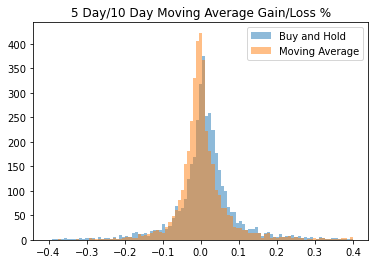

In [261]:
##This cell to be duplicated for each of the MA analyses 5MA/10MA, 10MA/20MA, 20MA/50MA, 5WMA/10WMA, 10WMA/20WMA, 20WMA/50WMA

#unique data frame just for 5-10 MA Analysis

#Remove unneccessary columns and rows that are holds
DF5MA10MA = alldata[['Date','Close','Asset','Class','5MA10MABoS']]
bool_series = DF5MA10MA['5MA10MABoS']!='HOLD'
DF5MA10MA = DF5MA10MA[bool_series]

#prior row asset 'PAsset' is needed to identify as the asset changes from one stock/coin to another in subsequent coding 
DF5MA10MA['PAsset']=DF5MA10MA['Asset'].shift(periods=1)
DF5MA10MA['P2Asset']=DF5MA10MA['Asset'].shift(periods=2)

#next row asset 'NAsset' is needed to identify as the asset changes from one stock/coin to another in subsequent coding 
DF5MA10MA['NAsset']=DF5MA10MA['Asset'].shift(periods=-1)
  
#Prior row references to evaluate trading strategy
DF5MA10MA['PrevClose']=DF5MA10MA['Close'].shift(periods=1)
DF5MA10MA['Prev2Close']=DF5MA10MA['Close'].shift(periods=2)
DF5MA10MA['Prev2Date']=DF5MA10MA['Date'].shift(periods=2) 
    
#The comparative cycles between the different strategies begins with buy signal. Can't sell something you haven't first bought.
bool_series = (DF5MA10MA['P2Asset'] == DF5MA10MA['Asset'])
DF5MA10MA = DF5MA10MA[bool_series]

#The comparative cycles between the different strategies ends with a buy signal. A sell signal is the beginning point of _
#   divergence between the two strategies.
def MustEndWithBuy(NAsset, Asset, BoS):
    if NAsset != Asset and BoS == 'SELL':
        return 'Remove'
    else:
        return 'Keep'
    
DF5MA10MA['Check2']= np.vectorize(MustEndWithBuy)(DF5MA10MA['NAsset'],DF5MA10MA['Asset'],DF5MA10MA['5MA10MABoS'])

bool_series = (DF5MA10MA['Check2'] == "Keep")
DF5MA10MA = DF5MA10MA[bool_series]
DF5MA10MA = DF5MA10MA.iloc[:,:-1]

DF5MA10MA = DF5MA10MA.dropna()

#Dropping the sell lines here as the buy lines have all the info we need.  Now each row represents on cycle iteration
bool_series = DF5MA10MA['5MA10MABoS'] == "BUY"
DF5MA10MA = DF5MA10MA[bool_series]

#Gains/Loss valuations from the two diff strategies in one cycle iteration '"'BaH' (Buy and Hold) and 'MAC' (Moving Avg Cross)
DF5MA10MA['BaHGL']=(DF5MA10MA['Close']-DF5MA10MA['Prev2Close'])/DF5MA10MA['Prev2Close']
DF5MA10MA['MACGL']=(DF5MA10MA['PrevClose']-DF5MA10MA['Prev2Close'])/DF5MA10MA['Prev2Close']
DF5MA10MA['CycleDays']=(DF5MA10MA['Date']-DF5MA10MA['Prev2Date']).dt.days

#results plotted
bins = np.linspace(-.4, .4, 100)
plt.hist(DF5MA10MA['BaHGL'], bins, alpha=0.5, label='Buy and Hold')
plt.hist(DF5MA10MA['MACGL'], bins, alpha=0.5, label='Moving Average')
plt.legend(loc=0)
plt.title('5 Day/10 Day Moving Average Gain/Loss %')
#plt.show()
Plt5MA10MA = plt

#Summary results with no class distinction

DF5MA10MASummary = DF5MA10MA.describe()
DF5MA10MASummary= DF5MA10MASummary.iloc[:,3:6]
#display(HTML(DF5MA10MASummary.to_html()))

#isolate means for later comparison
DF5MA10MASummary2 =DF5MA10MASummary.filter(['mean'], axis =0)
DF5MA10MASummary2 =DF5MA10MASummary2.drop(['CycleDays'], axis =1)
DF5MA10MASummary2['Model']="5/10MA"
print (DF5MA10MASummary2)

DF5MA10MAClassSummary = DF5MA10MA[['Class','BaHGL','MACGL']].melt(id_vars=['Class'])
DF5MA10MAClassSummary.columns=['Class', 'Method', 'GL']
DF5MA10MAClassSummary['Class_Method']=DF5MA10MAClassSummary['Class'] + '_' +DF5MA10MAClassSummary['Method']
DF5MA10MAClassSummary =DF5MA10MAClassSummary[['Class_Method','GL']]
DF5MA10MAClassSummary= DF5MA10MAClassSummary.groupby('Class_Method').describe()
#display(HTML(DF5MA10MAClassSummary.to_html()))


#T-Test'
result =stats.ttest_ind(a=DF5MA10MA['BaHGL'], b=DF5MA10MA['MACGL'], equal_var=True)
DF5MA10MATTestPValue = result.pvalue


       BaHGL   MACGL    Model
mean 0.10415 0.08957  10/20MA


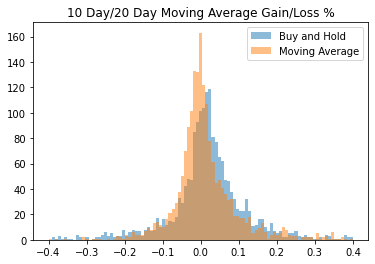

In [298]:
#unique data frame just for 10-20 MA Analysis

#Remove unneccessary columns and rows that are holds
DF10MA20MA = alldata[['Date','Close','Asset','Class','10MA20MABoS']]
bool_series = DF10MA20MA['10MA20MABoS']!='HOLD'
DF10MA20MA = DF10MA20MA[bool_series]

#prior row asset 'PAsset' is needed to identify as the asset changes from one stock/coin to another in subsequent coding 
DF10MA20MA['PAsset']=DF10MA20MA['Asset'].shift(periods=1)
DF10MA20MA['P2Asset']=DF10MA20MA['Asset'].shift(periods=2)

#next row asset 'NAsset' is needed to identify as the asset changes from one stock/coin to another in subsequent coding 
DF10MA20MA['NAsset']=DF10MA20MA['Asset'].shift(periods=-1)
  
#Prior row references to evaluate trading strategy
DF10MA20MA['PrevClose']=DF10MA20MA['Close'].shift(periods=1)
DF10MA20MA['Prev2Close']=DF10MA20MA['Close'].shift(periods=2)
DF10MA20MA['Prev2Date']=DF10MA20MA['Date'].shift(periods=2) 
    
#The comparative cycles between the different strategies begins with buy signal. Can't sell something you haven't first bought.
bool_series = (DF10MA20MA['P2Asset'] == DF10MA20MA['Asset'])
DF10MA20MA = DF10MA20MA[bool_series]

#The comparative cycles between the different strategies ends with a buy signal. A sell signal is the beginning point of _
#   divergence between the two strategies.
def MustEndWithBuy(NAsset, Asset, BoS):
    if NAsset != Asset and BoS == 'SELL':
        return 'Remove'
    else:
        return 'Keep'
    
DF10MA20MA['Check2']= np.vectorize(MustEndWithBuy)(DF10MA20MA['NAsset'],DF10MA20MA['Asset'],DF10MA20MA['10MA20MABoS'])

bool_series = (DF10MA20MA['Check2'] == "Keep")
DF10MA20MA = DF10MA20MA[bool_series]
DF10MA20MA = DF10MA20MA.iloc[:,:-1]

DF10MA20MA = DF10MA20MA.dropna()

#Dropping the sell lines here as the buy lines have all the info we need.  Now each row represents on cycle iteration
bool_series = DF10MA20MA['10MA20MABoS'] == "BUY"
DF10MA20MA = DF10MA20MA[bool_series]

#Gains/Loss valuations from the two diff strategies in one cycle iteration '"'BaH' (Buy and Hold) and 'MAC' (Moving Avg Cross)
DF10MA20MA['BaHGL']=(DF10MA20MA['Close']-DF10MA20MA['Prev2Close'])/DF10MA20MA['Prev2Close']
DF10MA20MA['MACGL']=(DF10MA20MA['PrevClose']-DF10MA20MA['Prev2Close'])/DF10MA20MA['Prev2Close']
DF10MA20MA['CycleDays']=(DF10MA20MA['Date']-DF10MA20MA['Prev2Date']).dt.days

#results plotted
bins = np.linspace(-.4, .4, 100)
plt.hist(DF10MA20MA['BaHGL'], bins, alpha=0.5, label='Buy and Hold')
plt.hist(DF10MA20MA['MACGL'], bins, alpha=0.5, label='Moving Average')
plt.legend(loc=0)
plt.title('10 Day/20 Day Moving Average Gain/Loss %')
#plt.close()


#Summary results with no class distinction

DF10MA20MASummary = DF10MA20MA.describe()
DF10MA20MASummary= DF10MA20MASummary.iloc[:,3:6]
#display(HTML(DF10MA20MASummary.to_html()))

#isolate means for later comparison
DF10MA20MASummary2 =DF10MA20MASummary.filter(['mean'], axis =0)
DF10MA20MASummary2 =DF10MA20MASummary2.drop(['CycleDays'], axis =1)
DF10MA20MASummary2['Model']="10/20MA"
print (DF10MA20MASummary2)

#DF10MA20MAClassSummary
DF10MA20MAClassSummary = DF10MA20MA[['Class','BaHGL','MACGL']].melt(id_vars=['Class'])
DF10MA20MAClassSummary.columns =['Class', 'Method', 'GL']
DF10MA20MAClassSummary['Class_Method']=DF10MA20MAClassSummary['Class'] + '_' +DF10MA20MAClassSummary['Method']
DF10MA20MAClassSummary =DF10MA20MAClassSummary[['Class_Method','GL']]
DF10MA20MAClassSummary= DF10MA20MAClassSummary.groupby('Class_Method').describe()
#display(HTML(DF10MA20MAClassSummary.to_html()))

#T-Test'
result =stats.ttest_ind(a=DF10MA20MA['BaHGL'], b=DF10MA20MA['MACGL'], equal_var=True)
DF10MA20MATTestPValue = result.pvalue


       BaHGL   MACGL    Model
mean 0.31479 0.25903  20/50MA


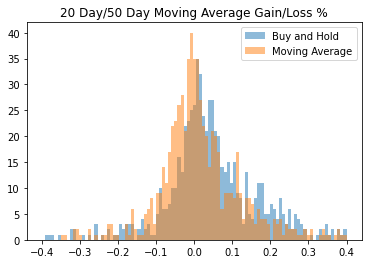

In [246]:
#unique data frame just for 20-50 MA Analysis

#Remove unneccessary columns and rows that are holds
DF20MA50MA = alldata[['Date','Close','Asset','Class','20MA50MABoS']]
bool_series = DF20MA50MA['20MA50MABoS']!='HOLD'
DF20MA50MA = DF20MA50MA[bool_series]

#prior row asset 'PAsset' is needed to identify as the asset changes from one stock/coin to another in subsequent coding 
DF20MA50MA['PAsset']=DF20MA50MA['Asset'].shift(periods=1)
DF20MA50MA['P2Asset']=DF20MA50MA['Asset'].shift(periods=2)

#next row asset 'NAsset' is needed to identify as the asset changes from one stock/coin to another in subsequent coding 
DF20MA50MA['NAsset']=DF20MA50MA['Asset'].shift(periods=-1)
  
#Prior row references to evaluate trading strategy
DF20MA50MA['PrevClose']=DF20MA50MA['Close'].shift(periods=1)
DF20MA50MA['Prev2Close']=DF20MA50MA['Close'].shift(periods=2)
DF20MA50MA['Prev2Date']=DF20MA50MA['Date'].shift(periods=2) 
    
#The comparative cycles between the different strategies begins with buy signal. Can't sell something you haven't first bought.
bool_series = (DF20MA50MA['P2Asset'] == DF20MA50MA['Asset'])
DF20MA50MA = DF20MA50MA[bool_series]

#The comparative cycles between the different strategies ends with a buy signal. A sell signal is the beginning point of _
#   divergence between the two strategies.
def MustEndWithBuy(NAsset, Asset, BoS):
    if NAsset != Asset and BoS == 'SELL':
        return 'Remove'
    else:
        return 'Keep'
    
DF20MA50MA['Check2']= np.vectorize(MustEndWithBuy)(DF20MA50MA['NAsset'],DF20MA50MA['Asset'],DF20MA50MA['20MA50MABoS'])

bool_series = (DF20MA50MA['Check2'] == "Keep")
DF20MA50MA = DF20MA50MA[bool_series]
DF20MA50MA = DF20MA50MA.iloc[:,:-1]

DF20MA50MA = DF20MA50MA.dropna()

#Dropping the sell lines here as the buy lines have all the info we need.  Now each row represents on cycle iteration
bool_series = DF20MA50MA['20MA50MABoS'] == "BUY"
DF20MA50MA = DF20MA50MA[bool_series]

#Gains/Loss valuations from the two diff strategies in one cycle iteration '"'BaH' (Buy and Hold) and 'MAC' (Moving Avg Cross)
DF20MA50MA['BaHGL']=(DF20MA50MA['Close']-DF20MA50MA['Prev2Close'])/DF20MA50MA['Prev2Close']
DF20MA50MA['MACGL']=(DF20MA50MA['PrevClose']-DF20MA50MA['Prev2Close'])/DF20MA50MA['Prev2Close']
DF20MA50MA['CycleDays']=(DF20MA50MA['Date']-DF20MA50MA['Prev2Date']).dt.days

#results plotted
bins = np.linspace(-.4, .4, 100)
plt.hist(DF20MA50MA['BaHGL'], bins, alpha=0.5, label='Buy and Hold')
plt.hist(DF20MA50MA['MACGL'], bins, alpha=0.5, label='Moving Average')
plt.legend(loc=0)
plt.title('20 Day/50 Day Moving Average Gain/Loss %')
#plt.show()

#Summary results with no class distinction

DF20MA50MASummary = DF20MA50MA.describe()
DF20MA50MASummary= DF20MA50MASummary.iloc[:,3:6]
#display(HTML(DF20MA50MASummary.to_html()))

#isolate means for later comparison
DF20MA50MASummary2 =DF20MA50MASummary.filter(['mean'], axis =0)
DF20MA50MASummary2 =DF20MA50MASummary2.drop(['CycleDays'], axis =1)
DF20MA50MASummary2['Model']="20/50MA"
print (DF20MA50MASummary2)

#DF20MA50MAClassSummary
DF20MA50MAClassSummary = DF20MA50MA[['Class','BaHGL','MACGL']].melt(id_vars=['Class'])
DF20MA50MAClassSummary.columns =['Class', 'Method', 'GL']
DF20MA50MAClassSummary['Class_Method']=DF20MA50MAClassSummary['Class'] + '_' +DF20MA50MAClassSummary['Method']
DF20MA50MAClassSummary =DF20MA50MAClassSummary[['Class_Method','GL']]
DF20MA50MAClassSummary= DF20MA50MAClassSummary.groupby('Class_Method').describe()
#display(HTML(DF20MA50MAClassSummary.to_html()))

#T-Test'
result =stats.ttest_ind(a=DF20MA50MA['BaHGL'], b=DF20MA50MA['MACGL'], equal_var=True)
DF20MA50MATTestPValue = result.pvalue


       BaHGL   MACGL    Model
mean 0.02842 0.01758  5/10WMA


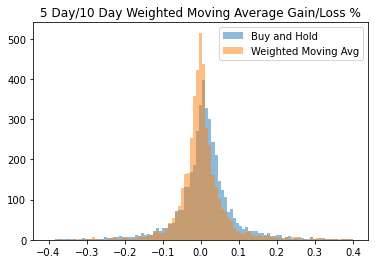

In [239]:
#unique data frame just for 5-10 WMA Analysis

#Remove unneccessary columns and rows that are holds
DF5WMA10WMA = alldata[['Date','Close','Asset','Class','5WMA10WMABoS']]
bool_series = DF5WMA10WMA['5WMA10WMABoS']!='HOLD'
DF5WMA10WMA = DF5WMA10WMA[bool_series]

#prior row asset 'PAsset' is needed to identify as the asset changes from one stock/coin to another in subsequent coding 
DF5WMA10WMA['PAsset']=DF5WMA10WMA['Asset'].shift(periods=1)
DF5WMA10WMA['P2Asset']=DF5WMA10WMA['Asset'].shift(periods=2)

#next row asset 'NAsset' is needed to identify as the asset changes from one stock/coin to another in subsequent coding 
DF5WMA10WMA['NAsset']=DF5WMA10WMA['Asset'].shift(periods=-1)
  
#Prior row references to evaluate trading strategy
DF5WMA10WMA['PrevClose']=DF5WMA10WMA['Close'].shift(periods=1)
DF5WMA10WMA['Prev2Close']=DF5WMA10WMA['Close'].shift(periods=2)
DF5WMA10WMA['Prev2Date']=DF5WMA10WMA['Date'].shift(periods=2) 
    
#The comparative cycles between the different strategies begins with buy signal. Can't sell something you haven't first bought.
bool_series = (DF5WMA10WMA['P2Asset'] == DF5WMA10WMA['Asset'])
DF5WMA10WMA = DF5WMA10WMA[bool_series]

#The comparative cycles between the different strategies ends with a buy signal. A sell signal is the beginning point of _
#   divergence between the two strategies.
def MustEndWithBuy(NAsset, Asset, BoS):
    if NAsset != Asset and BoS == 'SELL':
        return 'Remove'
    else:
        return 'Keep'
    
DF5WMA10WMA['Check2']= np.vectorize(MustEndWithBuy)(DF5WMA10WMA['NAsset'],DF5WMA10WMA['Asset'],DF5WMA10WMA['5WMA10WMABoS'])

bool_series = (DF5WMA10WMA['Check2'] == "Keep")
DF5WMA10WMA = DF5WMA10WMA[bool_series]
DF5WMA10WMA = DF5WMA10WMA.iloc[:,:-1]

DF5WMA10WMA = DF5WMA10WMA.dropna()

#Dropping the sell lines here as the buy lines have all the info we need.  Now each row represents on cycle iteration
bool_series = DF5WMA10WMA['5WMA10WMABoS'] == "BUY"
DF5WMA10WMA = DF5WMA10WMA[bool_series]

#Gains/Loss valuations from the two diff strategies in one cycle iteration '"'BaH' (Buy and Hold) and 'WMAC' (Moving Avg Cross)
DF5WMA10WMA['BaHGL']=(DF5WMA10WMA['Close']-DF5WMA10WMA['Prev2Close'])/DF5WMA10WMA['Prev2Close']
DF5WMA10WMA['MACGL']=(DF5WMA10WMA['PrevClose']-DF5WMA10WMA['Prev2Close'])/DF5WMA10WMA['Prev2Close']
DF5WMA10WMA['CycleDays']=(DF5WMA10WMA['Date']-DF5WMA10WMA['Prev2Date']).dt.days

#results plotted
bins = np.linspace(-.4, .4, 100)
plt.hist(DF5WMA10WMA['BaHGL'], bins, alpha=0.5, label='Buy and Hold')
plt.hist(DF5WMA10WMA['MACGL'], bins, alpha=0.5, label='Weighted Moving Avg')
plt.legend(loc=0)
plt.title('5 Day/10 Day Weighted Moving Average Gain/Loss %')
#plt.show()

#Summary results with no class distinction

DF5WMA10WMASummary = DF5WMA10WMA.describe()
DF5WMA10WMASummary= DF5WMA10WMASummary.iloc[:,3:6]
#display(HTML(DF5WMA10WMASummary.to_html()))

#isolate means for later comparison
DF5WMA10WMASummary2 =DF5WMA10WMASummary.filter(['mean'], axis =0)
DF5WMA10WMASummary2 =DF5WMA10WMASummary2.drop(['CycleDays'], axis =1)
DF5WMA10WMASummary2['Model']="5/10WMA"
print (DF5WMA10WMASummary2)

#DF5WMA10WMAClassSummary
DF5WMA10WMAClassSummary = DF5WMA10WMA[['Class','BaHGL','MACGL']].melt(id_vars=['Class'])
DF5WMA10WMAClassSummary.columns =['Class', 'Method', 'GL']
DF5WMA10WMAClassSummary['Class_Method']=DF5WMA10WMAClassSummary['Class'] + '_' +DF5WMA10WMAClassSummary['Method']
DF5WMA10WMAClassSummary =DF5WMA10WMAClassSummary[['Class_Method','GL']]
DF5WMA10WMAClassSummary= DF5WMA10WMAClassSummary.groupby('Class_Method').describe()
#display(HTML(DF5WMA10WMAClassSummary.to_html()))

#T-Test'
result =stats.ttest_ind(a=DF5WMA10WMA['BaHGL'], b=DF5WMA10WMA['MACGL'], equal_var=True)
DF5WMA10WMATTestPValue = result.pvalue


       BaHGL   MACGL     Model
mean 0.07950 0.05999  10/20WMA


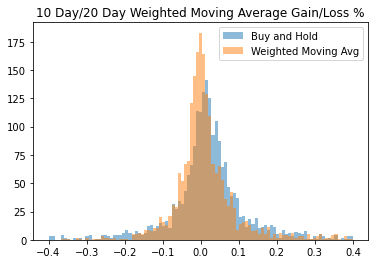

In [240]:
#unique data frame just for 10-20 WMA Analysis

#Remove unneccessary columns and rows that are holds
DF10WMA20WMA = alldata[['Date','Close','Asset','Class','10WMA20WMABoS']]
bool_series = DF10WMA20WMA['10WMA20WMABoS']!='HOLD'
DF10WMA20WMA = DF10WMA20WMA[bool_series]

#prior row asset 'PAsset' is needed to identify as the asset changes from one stock/coin to another in subsequent coding 
DF10WMA20WMA['PAsset']=DF10WMA20WMA['Asset'].shift(periods=1)
DF10WMA20WMA['P2Asset']=DF10WMA20WMA['Asset'].shift(periods=2)

#next row asset 'NAsset' is needed to identify as the asset changes from one stock/coin to another in subsequent coding 
DF10WMA20WMA['NAsset']=DF10WMA20WMA['Asset'].shift(periods=-1)
  
#Prior row references to evaluate trading strategy
DF10WMA20WMA['PrevClose']=DF10WMA20WMA['Close'].shift(periods=1)
DF10WMA20WMA['Prev2Close']=DF10WMA20WMA['Close'].shift(periods=2)
DF10WMA20WMA['Prev2Date']=DF10WMA20WMA['Date'].shift(periods=2) 
    
#The comparative cycles between the different strategies begins with buy signal. Can't sell something you haven't first bought.
bool_series = (DF10WMA20WMA['P2Asset'] == DF10WMA20WMA['Asset'])
DF10WMA20WMA = DF10WMA20WMA[bool_series]

#The comparative cycles between the different strategies ends with a buy signal. A sell signal is the beginning point of _
#   divergence between the two strategies.
def MustEndWithBuy(NAsset, Asset, BoS):
    if NAsset != Asset and BoS == 'SELL':
        return 'Remove'
    else:
        return 'Keep'
    
DF10WMA20WMA['Check2']= np.vectorize(MustEndWithBuy)(DF10WMA20WMA['NAsset'],DF10WMA20WMA['Asset'],\
                                                     DF10WMA20WMA['10WMA20WMABoS'])

bool_series = (DF10WMA20WMA['Check2'] == "Keep")
DF10WMA20WMA = DF10WMA20WMA[bool_series]
DF10WMA20WMA = DF10WMA20WMA.iloc[:,:-1]

DF10WMA20WMA = DF10WMA20WMA.dropna()

#Dropping the sell lines here as the buy lines have all the info we need.  Now each row represents on cycle iteration
bool_series = DF10WMA20WMA['10WMA20WMABoS'] == "BUY"
DF10WMA20WMA = DF10WMA20WMA[bool_series]

#Gains/Loss valuations from the two diff strategies in one cycle iteration '"'BaH' (Buy and Hold) and 'WMAC' (Moving Avg Cross)
DF10WMA20WMA['BaHGL']=(DF10WMA20WMA['Close']-DF10WMA20WMA['Prev2Close'])/DF10WMA20WMA['Prev2Close']
DF10WMA20WMA['MACGL']=(DF10WMA20WMA['PrevClose']-DF10WMA20WMA['Prev2Close'])/DF10WMA20WMA['Prev2Close']
DF10WMA20WMA['CycleDays']=(DF10WMA20WMA['Date']-DF10WMA20WMA['Prev2Date']).dt.days

#results plotted
bins = np.linspace(-.4, .4, 100)
plt.hist(DF10WMA20WMA['BaHGL'], bins, alpha=0.5, label='Buy and Hold')
plt.hist(DF10WMA20WMA['MACGL'], bins, alpha=0.5, label='Weighted Moving Avg')
plt.legend(loc=0)
plt.title('10 Day/20 Day Weighted Moving Average Gain/Loss %')
#plt.show()

#Summary results with no class distinction

DF10WMA20WMASummary = DF10WMA20WMA.describe()
DF10WMA20WMASummary= DF10WMA20WMASummary.iloc[:,3:6]
#display(HTML(DF10WMA20WMASummary.to_html()))

#isolate means for later comparison
DF10WMA20WMASummary2 =DF10WMA20WMASummary.filter(['mean'], axis =0)
DF10WMA20WMASummary2 =DF10WMA20WMASummary2.drop(['CycleDays'], axis =1)
DF10WMA20WMASummary2['Model']="10/20WMA"
print (DF10WMA20WMASummary2)

#DF10WMA20WMAClassSummary
DF10WMA20WMAClassSummary = DF10WMA20WMA[['Class','BaHGL','MACGL']].melt(id_vars=['Class'])
DF10WMA20WMAClassSummary.columns =['Class', 'Method', 'GL']
DF10WMA20WMAClassSummary['Class_Method']=DF10WMA20WMAClassSummary['Class'] + '_' +DF10WMA20WMAClassSummary['Method']
DF10WMA20WMAClassSummary =DF10WMA20WMAClassSummary[['Class_Method','GL']]
DF10WMA20WMAClassSummary= DF10WMA20WMAClassSummary.groupby('Class_Method').describe()
#display(HTML(DF10WMA20WMAClassSummary.to_html()))

#T-Test'
result =stats.ttest_ind(a=DF10WMA20WMA['BaHGL'], b=DF10WMA20WMA['MACGL'], equal_var=True)
DF10WMA20WMATTestPValue = result.pvalue


       BaHGL   MACGL     Model
mean 0.32481 0.25299  20/50WMA


0.583365682172651

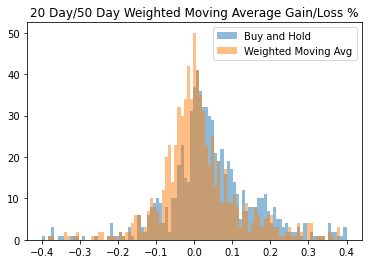

In [253]:
#unique data frame just for 20-50 WMA Analysis

#Remove unneccessary columns and rows that are holds
DF20WMA50WMA = alldata[['Date','Close','Asset','Class','20WMA50WMABoS']]
bool_series = DF20WMA50WMA['20WMA50WMABoS']!='HOLD'
DF20WMA50WMA = DF20WMA50WMA[bool_series]

#prior row asset 'PAsset' is needed to identify as the asset changes from one stock/coin to another in subsequent coding 
DF20WMA50WMA['PAsset']=DF20WMA50WMA['Asset'].shift(periods=1)
DF20WMA50WMA['P2Asset']=DF20WMA50WMA['Asset'].shift(periods=2)

#next row asset 'NAsset' is needed to identify as the asset changes from one stock/coin to another in subsequent coding 
DF20WMA50WMA['NAsset']=DF20WMA50WMA['Asset'].shift(periods=-1)
  
#Prior row references to evaluate trading strategy
DF20WMA50WMA['PrevClose']=DF20WMA50WMA['Close'].shift(periods=1)
DF20WMA50WMA['Prev2Close']=DF20WMA50WMA['Close'].shift(periods=2)
DF20WMA50WMA['Prev2Date']=DF20WMA50WMA['Date'].shift(periods=2) 
    
#The comparative cycles between the different strategies begins with buy signal. Can't sell something you haven't first bought.
bool_series = (DF20WMA50WMA['P2Asset'] == DF20WMA50WMA['Asset'])
DF20WMA50WMA = DF20WMA50WMA[bool_series]

#The comparative cycles between the different strategies ends with a buy signal. A sell signal is the beginning point of _
#   divergence between the two strategies.
def MustEndWithBuy(NAsset, Asset, BoS):
    if NAsset != Asset and BoS == 'SELL':
        return 'Remove'
    else:
        return 'Keep'
    
DF20WMA50WMA['Check2']= np.vectorize(MustEndWithBuy)(DF20WMA50WMA['NAsset'],DF20WMA50WMA['Asset'],\
                                                     DF20WMA50WMA['20WMA50WMABoS'])

bool_series = (DF20WMA50WMA['Check2'] == "Keep")
DF20WMA50WMA = DF20WMA50WMA[bool_series]
DF20WMA50WMA = DF20WMA50WMA.iloc[:,:-1]

DF20WMA50WMA = DF20WMA50WMA.dropna()

#Dropping the sell lines here as the buy lines have all the info we need.  Now each row represents on cycle iteration
bool_series = DF20WMA50WMA['20WMA50WMABoS'] == "BUY"
DF20WMA50WMA = DF20WMA50WMA[bool_series]

#Gains/Loss valuations from the two diff strategies in one cycle iteration '"'BaH' (Buy and Hold) and 'WMAC' (Moving Avg Cross)
DF20WMA50WMA['BaHGL']=(DF20WMA50WMA['Close']-DF20WMA50WMA['Prev2Close'])/DF20WMA50WMA['Prev2Close']
DF20WMA50WMA['MACGL']=(DF20WMA50WMA['PrevClose']-DF20WMA50WMA['Prev2Close'])/DF20WMA50WMA['Prev2Close']
DF20WMA50WMA['CycleDays']=(DF20WMA50WMA['Date']-DF20WMA50WMA['Prev2Date']).dt.days

#results plotted
bins = np.linspace(-.4, .4, 100)
plt.hist(DF20WMA50WMA['BaHGL'], bins, alpha=0.5, label='Buy and Hold')
plt.hist(DF20WMA50WMA['MACGL'], bins, alpha=0.5, label='Weighted Moving Avg')
plt.legend(loc=0)
plt.title('20 Day/50 Day Weighted Moving Average Gain/Loss %')
#plt.show()

#Summary results with no class distinction

DF20WMA50WMASummary = DF20WMA50WMA.describe()
DF20WMA50WMASummary= DF20WMA50WMASummary.iloc[:,3:6]
#display(HTML(DF20WMA50WMASummary.to_html()))

#isolate means for later comparison
DF20WMA50WMASummary2 =DF20WMA50WMASummary.filter(['mean'], axis =0)
DF20WMA50WMASummary2 =DF20WMA50WMASummary2.drop(['CycleDays'], axis =1)
DF20WMA50WMASummary2['Model']="20/50WMA"
print (DF20WMA50WMASummary2)

#DF20WMA50WMAClassSummary
DF20WMA50WMAClassSummary = DF20WMA50WMA[['Class','BaHGL','MACGL']].melt(id_vars=['Class'])
DF20WMA50WMAClassSummary.columns =['Class', 'Method', 'GL']
DF20WMA50WMAClassSummary['Class_Method']=DF20WMA50WMAClassSummary['Class'] + '_' +DF20WMA50WMAClassSummary['Method']
DF20WMA50WMAClassSummary =DF20WMA50WMAClassSummary[['Class_Method','GL']]
DF20WMA50WMAClassSummary= DF20WMA50WMAClassSummary.groupby('Class_Method').describe()
#display(HTML(DF20WMA50WMAClassSummary.to_html()))

#T-Test'
result =stats.ttest_ind(a=DF20WMA50WMA['BaHGL'], b=DF20WMA50WMA['MACGL'], equal_var=True)
DF20WMA50WMATTestPValue = result.pvalue
DF20WMA50WMATTestPValue


In [256]:
#Combine and Report Means and P-Value

PValueMATests = pd.DataFrame({'Model':['5/10MA', '10/20MA', '20/50MA', '5/10WMA', '10/20WMA', '20/50WMA'], \
                              'P-Value':[DF5MA10MATTestPValue, DF10MA20MATTestPValue, DF20MA50MATTestPValue, \
                                         DF5WMA10WMATTestPValue, DF10WMA20WMATTestPValue, DF20WMA50WMATTestPValue]})


def TTestCheck(PValue):
    if PValue < .05:
        return 'Sign diff of means, null hypo rejected'
    else:
        return 'No sign diff of means, null hypo accepted'

DF20WMA50WMA['Check2']= np.vectorize(MustEndWithBuy)(DF20WMA50WMA['NAsset'],DF20WMA50WMA['Asset'],\
                                                     DF20WMA50WMA['20WMA50WMABoS'])
    
    
PValueMATests['T-Test Results'] = np.vectorize(TTestCheck)(PValueMATests['P-Value'])


AllMAModelsSummary= pd.concat([DF5MA10MASummary2,DF10MA20MASummary2,DF20MA50MASummary2,DF5WMA10WMASummary2,\
                               DF10WMA20WMASummary2,DF20WMA50WMASummary2])
AllMAModelsSummary = AllMAModelsSummary.reindex(columns=['Model','BaHGL', 'MACGL'])

AllMAModelsResults = pd.merge(AllMAModelsSummary,PValueMATests,how="inner",on="Model")
AllMAModelsResults

,Model,BaHGL,MACGL,P-Value,T-Test Results
0,5/10MA,0.03209,0.02012,0.02680,"Sign diff of means, null hypo rejected"
1,10/20MA,0.10415,0.08957,0.74929,"No sign diff of means, null hypo accepted"
2,20/50MA,0.31479,0.25903,0.62397,"No sign diff of means, null hypo accepted"
3,5/10WMA,0.02842,0.01758,0.02052,"Sign diff of means, null hypo rejected"
4,10/20WMA,0.07950,0.05999,0.43579,"No sign diff of means, null hypo accepted"
5,20/50WMA,0.32481,0.25299,0.58337,"No sign diff of means, null hypo accepted"


In [300]:
##START OF SECTION 2: PRICE AND VOLUME TREND ANALYSIS

alldata2['Close1']= alldata2['Close'].shift(periods=1)
alldata2['Close2']= alldata2['Close'].shift(periods=2)
alldata2['Close3']= alldata2['Close'].shift(periods=3)
alldata2['Volume1']= alldata2['Volume'].shift(periods=1)
alldata2['Volume2']= alldata2['Volume'].shift(periods=2)
alldata2['Volume3']= alldata2['Volume'].shift(periods=3)
alldata2['PAsset']= alldata2['Asset'].shift(periods=3)
alldata2['FAsset']= alldata2['Asset'].shift(periods=-20)

alldata2['FClose10']= alldata2['Close'].shift(periods=-10)
alldata2['FClose20']= alldata2['Close'].shift(periods=-20)
#Future Price Increase/Decrease
alldata2['FClose5']= (alldata2['Close'].shift(periods=-5) - alldata2['Close'])/alldata2['Close']
alldata2['FClose10']= (alldata2['Close'].shift(periods=-10) - alldata2['Close'])/alldata2['Close']
alldata2['FClose20']= (alldata2['Close'].shift(periods=-20) - alldata2['Close'])/alldata2['Close']

#Need to drop the first 3 records for each asset due to prior date fields resulting in NaN
alldata2['index'] = alldata2.index
bool_series2 = alldata2['index'] >3
alldata2 = alldata2[bool_series2]
alldata2 = alldata2.dropna()

def VPTrend(Close, Close1, Close2, Close3, Volume, Volume1, Volume2, Volume3):
    if Close > Close1 and Close1 > Close2 and Close2 > Close3 and Volume > Volume1 and\
    Volume1 > Volume2 and Volume2 > Volume3:
        return 'PriceUpVolUp'
    elif Close > Close1 and Close1 > Close2 and Close2 > Close3 and Volume < Volume1 and\
    Volume1 < Volume2 and Volume2 < Volume3:
        return 'PriceUpVolDown'
    elif Close < Close1 and Close1 < Close2 and Close2 < Close3 and Volume < Volume1 and\
    Volume1 < Volume2 and Volume2 < Volume3:
        return 'PriceDownVolDown'
    elif Close < Close1 and Close1 < Close2 and Close2 < Close3 and Volume > Volume1 and\
    Volume1 > Volume2 and Volume2 > Volume3:
        return 'PriceDownVolUp'
    else:
        return 'Mix'
    
alldata2['VPTrend']= np.vectorize(VPTrend)(alldata2['Close'],alldata2['Close1'],alldata2['Close2'],\
                                           alldata2['Close3'],alldata2['Volume'],alldata2['Volume1'],\
                                           alldata2['Volume2'],alldata2['Volume3'])

#The comparative cycles between the different strategies begins with buy signal. Can't sell something you haven't first bought.
bool_series = (alldata2['PAsset'] == alldata2['Asset']) 
alldata2 = alldata2[bool_series]

bool_series2 = (alldata2['FAsset'] == alldata2['Asset']) 
alldata2 = alldata2[bool_series2]


In [372]:
# Creating dummy variables:
alldata2_dc = pd.get_dummies(alldata2, columns=['VPTrend'])
alldata2_dc = alldata2_dc.drop('VPTrend_Mix', axis =1)

In [392]:
#Descriptive Statistics on Section 2 Results
pd.options.display.float_format = '{:.0f}'.format

DescSummary = pd.DataFrame(alldata2_dc[['Class','VPTrend_PriceDownVolDown','VPTrend_PriceDownVolUp',\
                                        'VPTrend_PriceUpVolDown','VPTrend_PriceUpVolUp']])
DescSummary2 = DescSummary.groupby(['Class']).count()

DescSummaryTot = DescSummary2.sum()
DescSummaryTot.round(0)
DescSummaryTot.name = 'Total'
DescSummaryCount = DescSummary2.append(DescSummaryTot.transpose())
DescSummaryCount['Class'] = DescSummaryCount.index
DescSummaryCount['Class'] = DescSummaryCount['Class'] + '_Considered' 
DescSummaryCount

DescSummary2 = DescSummary.groupby(['Class']).sum()
DescSummary2

DescSummaryTot = DescSummary2.sum()
DescSummaryTot.name = 'Total'
DescSummarySum = DescSummary2.append(DescSummaryTot.transpose())
DescSummarySum['Class'] = DescSummarySum.index
DescSummarySum['Class'] = DescSummarySum['Class'] + '_Identified' 

DescSummarySum=DescSummarySum[["Class","VPTrend_PriceDownVolDown","VPTrend_PriceDownVolUp","VPTrend_PriceUpVolDown",\
                               "VPTrend_PriceUpVolUp"]]
DescSummarytemp = pd.concat([DescSummaryCount, DescSummarySum], axis=1)

DescSummarytemp['VPTrend_PriceDownVolDown2'] = (DescSummarytemp.iloc[:,6] / DescSummarytemp.iloc[:,0]) *100
DescSummarytemp['VPTrend_PriceDownVolUp2'] = (DescSummarytemp.iloc[:,7] / DescSummarytemp.iloc[:,1]) *100
DescSummarytemp['VPTrend_PriceUpVolDown2'] = (DescSummarytemp.iloc[:,8] / DescSummarytemp.iloc[:,2]) *100
DescSummarytemp['VPTrend_PriceUpVolUp2'] = (DescSummarytemp.iloc[:,9] / DescSummarytemp.iloc[:,3]) *100

DescSummarytemp['VPTrend_PriceDownVolDown2'] = DescSummarytemp['VPTrend_PriceDownVolDown2'].apply(str)
DescSummarytemp['VPTrend_PriceDownVolDown2'] = DescSummarytemp['VPTrend_PriceDownVolDown2'].str[:4] +'%'
DescSummarytemp['VPTrend_PriceDownVolUp2'] = DescSummarytemp['VPTrend_PriceDownVolUp2'].apply(str)
DescSummarytemp['VPTrend_PriceDownVolUp2'] = DescSummarytemp['VPTrend_PriceDownVolUp2'].str[:4] +'%'
DescSummarytemp['VPTrend_PriceUpVolDown2'] = DescSummarytemp['VPTrend_PriceUpVolDown2'].apply(str)
DescSummarytemp['VPTrend_PriceUpVolDown2'] = DescSummarytemp['VPTrend_PriceUpVolDown2'].str[:4] +'%'
DescSummarytemp['VPTrend_PriceUpVolUp2'] = DescSummarytemp['VPTrend_PriceUpVolUp2'].apply(str)
DescSummarytemp['VPTrend_PriceUpVolUp2'] = DescSummarytemp['VPTrend_PriceUpVolUp2'].str[:4] +'%'

DescSummaryRate = DescSummarytemp.iloc[:,-5:]
DescSummaryRate.columns = DescSummarySum.columns

DescSummaryRate['Class'] = DescSummarySum.index
DescSummaryRate['Class'] = DescSummarySum['Class'] + '_Rate'

DescSummary3 = pd.concat([DescSummaryCount,DescSummarySum,DescSummaryRate], axis=0)

DescSummary3=DescSummary3[["Class","VPTrend_PriceDownVolDown","VPTrend_PriceDownVolUp","VPTrend_PriceUpVolDown",\
                           "VPTrend_PriceUpVolUp"]]
DescSummary3=DescSummary3.sort_index(axis=0, ascending=True)

DescSummary3


,Class,VPTrend_PriceDownVolDown,VPTrend_PriceDownVolUp,VPTrend_PriceUpVolDown,VPTrend_PriceUpVolUp
Class,,,,,
Crypto,Crypto_Considered,13013,13013,13013,13013
Crypto,Crypto_Identified,191,68,61,280
Crypto,Crypto_Identified_Rate,1.46%,0.52%,0.46%,2.15%
Index,Index_Considered,30270,30270,30270,30270
Index,Index_Identified,39,190,281,140
Index,Index_Identified_Rate,0.12%,0.62%,0.92%,0.46%
Stock,Stock_Considered,29760,29760,29760,29760
Stock,Stock_Identified,167,258,316,256
Stock,Stock_Identified_Rate,0.56%,0.86%,1.06%,0.86%


In [302]:
#ALL Class Models
#All5model
x = alldata2_dc[['VPTrend_PriceDownVolDown','VPTrend_PriceDownVolUp','VPTrend_PriceUpVolDown','VPTrend_PriceUpVolUp']]
x = sm.add_constant(x) # adding a constant
y = alldata2['FClose5']

All5model = sm.OLS(y, x).fit()
All5predictions = All5model.predict(x) 
print(All5model.summary())

#All10model
x = alldata2_dc[['VPTrend_PriceDownVolDown','VPTrend_PriceDownVolUp','VPTrend_PriceUpVolDown','VPTrend_PriceUpVolUp']]
x = sm.add_constant(x) # adding a constant
y = alldata2['FClose10']

All10model = sm.OLS(y, x).fit()
All10predictions = All10model.predict(x) 
print(All10model.summary())

#All20model
x = alldata2_dc[['VPTrend_PriceDownVolDown','VPTrend_PriceDownVolUp','VPTrend_PriceUpVolDown','VPTrend_PriceUpVolUp']]
x = sm.add_constant(x) # adding a constant
y = alldata2['FClose20']

All20model = sm.OLS(y, x).fit()
All20predictions = All20model.predict(x) 
print(All20model.summary())


                            OLS Regression Results                            
Dep. Variable:                FClose5   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     18.28
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           5.06e-15
Time:                        09:35:33   Log-Likelihood:                 71351.
No. Observations:               73043   AIC:                        -1.427e+05
Df Residuals:                   73038   BIC:                        -1.426e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [303]:
#Stocks Only Class Models
#Stock5model

StockData2 = alldata2_dc[alldata2_dc['Class'] == 'Stock']

x = StockData2[['VPTrend_PriceDownVolDown','VPTrend_PriceDownVolUp','VPTrend_PriceUpVolDown','VPTrend_PriceUpVolUp']]
x = sm.add_constant(x) # adding a constant
y = StockData2['FClose5']

Stock5model = sm.OLS(y, x).fit()
Stock5predictions = Stock5model.predict(x) 
print(Stock5model.summary())

#Stock10model
x = StockData2[['VPTrend_PriceDownVolDown','VPTrend_PriceDownVolUp','VPTrend_PriceUpVolDown','VPTrend_PriceUpVolUp']]
x = sm.add_constant(x) # adding a constant
y = StockData2['FClose10']

Stock10model = sm.OLS(y, x).fit()
Stock10predictions = Stock10model.predict(x) 
print(Stock10model.summary())

#Stock20model
x = StockData2[['VPTrend_PriceDownVolDown','VPTrend_PriceDownVolUp','VPTrend_PriceUpVolDown','VPTrend_PriceUpVolUp']]
x = sm.add_constant(x) # adding a constant
y = StockData2['FClose20']

Stock20model = sm.OLS(y, x).fit()
Stock20predictions = Stock20model.predict(x) 
print(Stock20model.summary())


                            OLS Regression Results                            
Dep. Variable:                FClose5   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.999
Date:                Sat, 02 Apr 2022   Prob (F-statistic):            0.00303
Time:                        09:35:39   Log-Likelihood:                 52428.
No. Observations:               29760   AIC:                        -1.048e+05
Df Residuals:                   29755   BIC:                        -1.048e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [304]:
#Index Only Class Models
#Index5model

IndexData2 = alldata2_dc[alldata2_dc['Class'] == 'Index']

x = IndexData2[['VPTrend_PriceDownVolDown','VPTrend_PriceDownVolUp','VPTrend_PriceUpVolDown','VPTrend_PriceUpVolUp']]
x = sm.add_constant(x) # adding a constant
y = IndexData2['FClose5']

Index5model = sm.OLS(y, x).fit()
Index5predictions = Index5model.predict(x) 
print(Index5model.summary())

#Index10model
x = IndexData2[['VPTrend_PriceDownVolDown','VPTrend_PriceDownVolUp','VPTrend_PriceUpVolDown','VPTrend_PriceUpVolUp']]
x = sm.add_constant(x) # adding a constant
y = IndexData2['FClose10']

Index10model = sm.OLS(y, x).fit()
Index10predictions = Index10model.predict(x) 
print(Index10model.summary())

#Index20model
x = IndexData2[['VPTrend_PriceDownVolDown','VPTrend_PriceDownVolUp','VPTrend_PriceUpVolDown','VPTrend_PriceUpVolUp']]
x = sm.add_constant(x) # adding a constant
y = IndexData2['FClose20']

Index20model = sm.OLS(y, x).fit()
Index20predictions = Index20model.predict(x) 
print(Index20model.summary())


                            OLS Regression Results                            
Dep. Variable:                FClose5   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.522
Date:                Sat, 02 Apr 2022   Prob (F-statistic):             0.0390
Time:                        09:35:43   Log-Likelihood:                 63493.
No. Observations:               30270   AIC:                        -1.270e+05
Df Residuals:                   30265   BIC:                        -1.269e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [307]:
#Crypto Only Class Models
#Crypto5model

CryptoData2 = alldata2_dc[alldata2_dc['Class'] == 'Crypto']

x = CryptoData2[['VPTrend_PriceDownVolDown','VPTrend_PriceDownVolUp','VPTrend_PriceUpVolDown','VPTrend_PriceUpVolUp']]
x = sm.add_constant(x) # adding a constant
y = CryptoData2['FClose5']

Crypto5model = sm.OLS(y, x).fit()
Crypto5predictions = Crypto5model.predict(x) 
print(Crypto5model.summary())

#Crypto10model
x = CryptoData2[['VPTrend_PriceDownVolDown','VPTrend_PriceDownVolUp','VPTrend_PriceUpVolDown','VPTrend_PriceUpVolUp']]
x = sm.add_constant(x) # adding a constant
y = CryptoData2['FClose10']

Crypto10model = sm.OLS(y, x).fit()
Crypto10predictions = Crypto10model.predict(x) 
print(Crypto10model.summary())

#Crypto20model
x = CryptoData2[['VPTrend_PriceDownVolDown','VPTrend_PriceDownVolUp','VPTrend_PriceUpVolDown','VPTrend_PriceUpVolUp']]
x = sm.add_constant(x) # adding a constant
y = CryptoData2['FClose20']

Crypto20model = sm.OLS(y, x).fit()
Crypto20predictions = Crypto20model.predict(x) 
print(Crypto20model.summary())


                            OLS Regression Results                            
Dep. Variable:                FClose5   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.118
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           2.37e-07
Time:                        09:42:18   Log-Likelihood:                 2487.5
No. Observations:               13013   AIC:                            -4965.
Df Residuals:                   13008   BIC:                            -4928.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [385]:
coef = pd.DataFrame(All5model.params, columns = ['Coefficient'])
pval = pd.DataFrame(All5model.pvalues, columns = ['P-Values'])
OLSAll5 = pd.concat([coef, pval], axis = 1)
OLSAll5['Significant?']= OLSAll5['P-Values']<.05
OLSAll5['Model']='All5'

coef = pd.DataFrame(All10model.params, columns = ['Coefficient'])
pval = pd.DataFrame(All10model.pvalues, columns = ['P-Values'])
OLSAll10 = pd.concat([coef, pval], axis = 1)
OLSAll10['Significant?']= OLSAll10['P-Values']<.05
OLSAll10['Model']='All10'

coef = pd.DataFrame(All20model.params, columns = ['Coefficient'])
pval = pd.DataFrame(All20model.pvalues, columns = ['P-Values'])
OLSAll20 = pd.concat([coef, pval], axis = 1)
OLSAll20['Significant?']= OLSAll20['P-Values']<.05
OLSAll20['Model']='All20'

coef = pd.DataFrame(Stock5model.params, columns = ['Coefficient'])
pval = pd.DataFrame(Stock5model.pvalues, columns = ['P-Values'])
OLSStock5 = pd.concat([coef, pval], axis = 1)
OLSStock5['Significant?']= OLSStock5['P-Values']<.05
OLSStock5['Model']='Stock5'

coef = pd.DataFrame(Stock10model.params, columns = ['Coefficient'])
pval = pd.DataFrame(Stock10model.pvalues, columns = ['P-Values'])
OLSStock10 = pd.concat([coef, pval], axis = 1)
OLSStock10['Significant?']= OLSStock10['P-Values']<.05
OLSStock10['Model']='Stock10'

coef = pd.DataFrame(Stock20model.params, columns = ['Coefficient'])
pval = pd.DataFrame(Stock20model.pvalues, columns = ['P-Values'])
OLSStock20 = pd.concat([coef, pval], axis = 1)
OLSStock20['Significant?']= OLSStock20['P-Values']<.05
OLSStock20['Model']='Stock20'

coef = pd.DataFrame(Index5model.params, columns = ['Coefficient'])
pval = pd.DataFrame(Index5model.pvalues, columns = ['P-Values'])
OLSIndex5 = pd.concat([coef, pval], axis = 1)
OLSIndex5['Significant?']= OLSIndex5['P-Values']<.05
OLSIndex5['Model']='Index5'

coef = pd.DataFrame(Index10model.params, columns = ['Coefficient'])
pval = pd.DataFrame(Index10model.pvalues, columns = ['P-Values'])
OLSIndex10 = pd.concat([coef, pval], axis = 1)
OLSIndex10['Significant?']= OLSIndex10['P-Values']<.05
OLSIndex10['Model']='Index10'

coef = pd.DataFrame(Index20model.params, columns = ['Coefficient'])
pval = pd.DataFrame(Index20model.pvalues, columns = ['P-Values'])
OLSIndex20 = pd.concat([coef, pval], axis = 1)
OLSIndex20['Significant?']= OLSIndex20['P-Values']<.05
OLSIndex20['Model']='Index20'

coef = pd.DataFrame(Crypto5model.params, columns = ['Coefficient'])
pval = pd.DataFrame(Crypto5model.pvalues, columns = ['P-Values'])
OLSCrypto5 = pd.concat([coef, pval], axis = 1)
OLSCrypto5['Significant?']= OLSCrypto5['P-Values']<.05
OLSCrypto5['Model']='Crypto5'

coef = pd.DataFrame(Crypto10model.params, columns = ['Coefficient'])
pval = pd.DataFrame(Crypto10model.pvalues, columns = ['P-Values'])
OLSCrypto10 = pd.concat([coef, pval], axis = 1)
OLSCrypto10['Significant?']= OLSCrypto10['P-Values']<.05
OLSCrypto10['Model']='Crypto10'

coef = pd.DataFrame(Crypto20model.params, columns = ['Coefficient'])
pval = pd.DataFrame(Crypto20model.pvalues, columns = ['P-Values'])
OLSCrypto20 = pd.concat([coef, pval], axis = 1)
OLSCrypto20['Significant?']= OLSCrypto20['P-Values']<.05
OLSCrypto20['Model']='Crypto20'

OLSResults = pd.concat([OLSAll5, OLSAll10, OLSAll20, OLSStock5, OLSStock10, OLSStock20, OLSIndex5, OLSIndex10, \
                        OLSIndex20, OLSCrypto5, OLSCrypto10, OLSCrypto20], axis = 0)
OLSResults = OLSResults
OLSResults['Predictor'] = OLSResults.index 
bool_series = OLSResults['Significant?'] == True
OLSResults = OLSResults[bool_series]
bool_series = OLSResults['Predictor'] != 'const'
OLSResults = OLSResults[bool_series]
OLSResults = OLSResults.iloc[:,0:4]

OLSResults

,Coefficient,P-Values,Significant?,Model
VPTrend_PriceDownVolDown,-0.0116,0.0114,True,All5
VPTrend_PriceUpVolUp,0.0284,0.0000,True,All5
VPTrend_PriceDownVolUp,-0.0129,0.0492,True,All10
VPTrend_PriceUpVolUp,0.0397,0.0000,True,All10
VPTrend_PriceDownVolUp,-0.0224,0.0487,True,All20
VPTrend_PriceUpVolUp,0.1060,0.0000,True,All20
VPTrend_PriceDownVolUp,0.0088,0.0007,True,Stock5
VPTrend_PriceUpVolUp,-0.0107,0.0447,True,Stock20
VPTrend_PriceUpVolUp,-0.0050,0.0466,True,Index5
VPTrend_PriceDownVolUp,-0.0086,0.0037,True,Index10


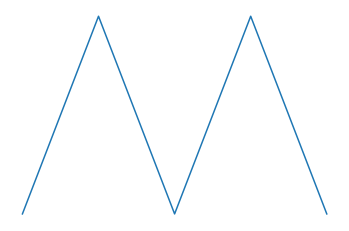

In [155]:
# Generate Standard for Double Top
df = pd.read_csv('C:\MIS581\ChartTemplates\DT.csv')
plt.plot(df['Time'], df['Base Value'])
plt.axis('off')
plt.savefig('DT_Train/DTStandard.png')

RandAdjuster = 8

# Generate Training Set for Double Top with randomized (normally distributed variations)
for x in range(0,1000):
        np.random.seed(x)
        RandMult =(np.random.randn(len(df),1)/5)
        dfr = pd.DataFrame(RandMult)
        df2 = pd.merge(df, dfr, left_index=True, right_index=True)
        df2.columns=['Time', 'Base Value', 'Multiplier']
        df2['Value']=df2['Base Value'] + (RandAdjuster * df2['Multiplier'])  
        plt.figure()
        plt.plot(df2['Time'], df2['Value'])
        plt.axis('off')
        if x < 800:
            plt.savefig('DT_Train/DT_Train_' + str(x) +'.png')
        else:
            plt.savefig('DT_Test/DT_Test_' + str(x) +'.png')
        plt.close()

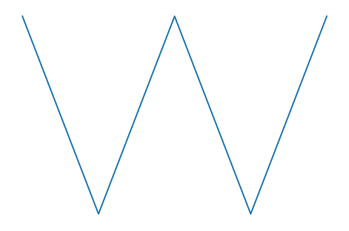

In [156]:
# Generate Standard for Double Bottom
df = pd.read_csv('C:\MIS581\ChartTemplates\DB.csv')
plt.plot(df['Time'], df['Base Value'])
plt.axis('off')
plt.savefig('DB_Train/DBStandard.png')

RandAdjuster = 8

# Generate Training Set for Double Bottom with randomized (normally distributed variations)
for x in range(0,1000):
        np.random.seed(x)
        RandMult =(np.random.randn(len(df),1)/5)
        dfr = pd.DataFrame(RandMult)
        df2 = pd.merge(df, dfr, left_index=True, right_index=True)
        df2.columns=['Time', 'Base Value', 'Multiplier']
        df2['Value']=df2['Base Value'] + (RandAdjuster * df2['Multiplier'])  
        plt.figure()
        plt.plot(df2['Time'], df2['Value'])
        plt.axis('off')
        if x < 800:
            plt.savefig('DB_Train/DB_Train_' + str(x) +'.png')
        else:
            plt.savefig('DB_Test/DB_Test_' + str(x) +'.png')
        plt.close()

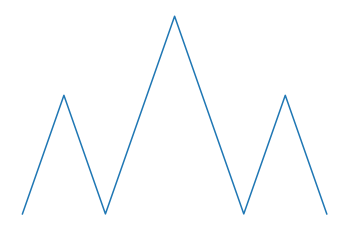

In [129]:
# Generate Standard for Head and Shoulders
df = pd.read_csv('C:\MIS581\ChartTemplates\HS.csv')
plt.plot(df['Time'], df['Base Value'])
plt.axis('off')
plt.savefig('HS_Train/HSStandard.png')

RandAdjuster = 12

# Generate Training Set for Head and Shoulders with randomized (normally distributed variations)
for x in range(0,1000):
        np.random.seed(x)
        RandMult =(np.random.randn(len(df),1)/5)
        dfr = pd.DataFrame(RandMult)
        df2 = pd.merge(df, dfr, left_index=True, right_index=True)
        df2.columns=['Time', 'Base Value', 'Multiplier']
        df2['Value']=df2['Base Value'] + (RandAdjuster * df2['Multiplier'])  
        plt.figure()
        plt.plot(df2['Time'], df2['Value'])
        plt.axis('off')
        if x < 800:
            plt.savefig('HS_Train/HS_Train_' + str(x) +'.png')
        else:
            plt.savefig('HS_Test/HS_Test_' + str(x) +'.png')
        plt.close()

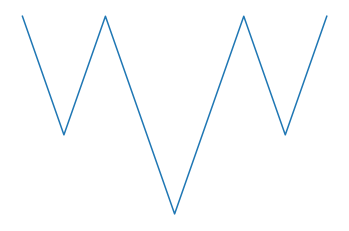

In [126]:
# Generate Standard for Inverted Head and Shoulders
df = pd.read_csv('C:\MIS581\ChartTemplates\IHS.csv')
plt.plot(df['Time'], df['Base Value'])
plt.axis('off')
plt.savefig('IHS_Train/IHSStandard.png')

RandAdjuster = 12

# Generate Training Set for Head and Shoulders with randomized (normally distributed variations)
for x in range(0,1000):
        np.random.seed(x)
        RandMult =(np.random.randn(len(df),1)/5)
        dfr = pd.DataFrame(RandMult)
        df2 = pd.merge(df, dfr, left_index=True, right_index=True)
        df2.columns=['Time', 'Base Value', 'Multiplier']
        df2['Value']=df2['Base Value'] + (RandAdjuster * df2['Multiplier'])  
        plt.figure()
        plt.plot(df2['Time'], df2['Value'])
        plt.axis('off')
        if x < 800:
            plt.savefig('IHS_Train/IHS_Train_' + str(x) +'.png')
        else:
            plt.savefig('IHS_Test/IHS_Test_' + str(x) +'.png')
        plt.close()

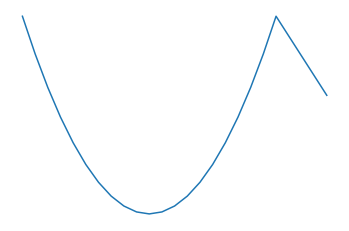

In [133]:
# Generate Standard for Cup and Handle
df = pd.read_csv('C:\MIS581\ChartTemplates\CH.csv')
plt.plot(df['Time'], df['Base Value'])
plt.axis('off')
plt.savefig('CH_Train/CHStandard.png')

RandAdjuster = 60

# Generate Training Set for Head and Shoulders with randomized (normally distributed variations)
for x in range(0,1000):
        np.random.seed(x)
        RandMult =(np.random.randn(len(df),1)/5)
        dfr = pd.DataFrame(RandMult)
        df2 = pd.merge(df, dfr, left_index=True, right_index=True)
        df2.columns=['Time', 'Base Value', 'Multiplier']
        df2['Value']=df2['Base Value'] + (RandAdjuster * df2['Multiplier'])  
        plt.figure()
        plt.plot(df2['Time'], df2['Value'])
        plt.axis('off')
        if x < 800:
            plt.savefig('CH_Train/CH_Train_' + str(x) +'.png')
        else:
            plt.savefig('CH_Test/CH_Test_' + str(x) +'.png')
        plt.close()

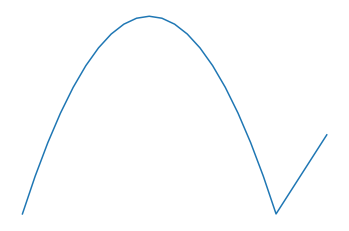

In [135]:
# Generate Standard for Inverted Cup and Handle
#df.drop(df.index, inplace=True)
df = pd.read_csv('C:\MIS581\ChartTemplates\ICH.csv')
plt.plot(df['Time'], df['Base Value'])
plt.axis('off')
plt.savefig('ICH_Train/ICHStandard.png')

RandAdjuster = 60

# Generate Training Set for Head and Shoulders with randomized (normally distributed variations)
for x in range(0,1000):
        np.random.seed(x)
        RandMult =(np.random.randn(len(df),1)/5)
        dfr = pd.DataFrame(RandMult)
        df2 = pd.merge(df, dfr, left_index=True, right_index=True)
        df2.columns=['Time', 'Base Value', 'Multiplier']
        df2['Value']=df2['Base Value'] + (RandAdjuster * df2['Multiplier'])  
        plt.figure()
        plt.plot(df2['Time'], df2['Value'])
        plt.axis('off')
        if x < 800:
            plt.savefig('ICH_Train/ICH_Train_' + str(x) +'.png')
        else:
            plt.savefig('ICH_Test/ICH_Test_' + str(x) +'.png')
        plt.close()

In [227]:
#Generate Random Charts (Train_Falses)
df = pd.DataFrame(range(0,40))
df.columns=['Time']
df['Value']=0
z=1

for y in range(0,1000):
    np.random.seed(z)
    z = z+1
    df2=df
    df2.at[0,'Value'] = np.random.randint(100,1000)

    #Random Volatility Multiplier
    RandAdjuster = np.random.randint(20,300,1)

    for x in range(1,40):
        np.random.seed(z)
        z = z+1
        df2.at[(x),'Value'] = df2.at[(x-1),'Value']+ RandAdjuster *(np.random.randn()/5)

    plt.figure()
    plt.plot(df['Time'], df2['Value'])
    plt.axis('off')
    if y < 800:
        plt.savefig('Rand_Train/Rand_Train_' + str(y) +'.png')
    else:
        plt.savefig('Rand_Test/Rand_Test_' + str(y) +'.png')
    plt.close()


In [34]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(100,100))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [35]:
#Training Models

Chart = 'DT'
train_path = Chart +'vsRand\Train'
test_path = Chart +'vsRand\Test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(100,100), classes=[Chart, 'Rand'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), classes=[Chart, 'Rand'], batch_size=400)

imgs, labels = next(train_batches)

DTmodel = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(100,100,3)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(units=2, activation='softmax'),
])

DTmodel.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

DTmodel.fit(x=train_batches, epochs=2, verbose=2)

test_imgs, test_labels = next(test_batches)
predictions = DTmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['Predicted']
results
answers= pd.DataFrame(test_labels)
answers= answers.drop([1], axis =1)
answers.columns=['Actual']

results2=pd.merge(results,answers,left_index=True, right_index=True)
results2['Results']= results2['Predicted']== results2['Actual']

results3 = results2.groupby(['Results']).count()
accuracy = results3.iloc[1,0] / (results3.iloc[0,0]+results3.iloc[1,0])

DTaccuracy = pd.DataFrame({'Chart':[Chart], 'Accuracy':[accuracy]})


Found 1602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
  ...
    to  
  ['...']
Train for 161 steps
Epoch 1/2
161/161 - 6s - loss: 0.6737 - accuracy: 0.9426
Epoch 2/2
161/161 - 3s - loss: 0.0729 - accuracy: 0.9906


In [36]:
Chart = 'DB'

train_path = Chart +'vsRand\Train'
test_path = Chart +'vsRand\Test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(100,100), classes=[Chart, 'Rand'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), classes=[Chart, 'Rand'], batch_size=400)

imgs, labels = next(train_batches)

DBmodel = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(100,100,3)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(units=2, activation='softmax'),
])

DBmodel.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

DBmodel.fit(x=train_batches, epochs=2, verbose=2)

test_imgs, test_labels = next(test_batches)
predictions = DBmodel.predict(x=test_batches, verbose=0)
predictions=np.round(predictions)
predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['Predicted']
results
answers= pd.DataFrame(test_labels)
answers= answers.drop([1], axis =1)
answers.columns=['Actual']

results2=pd.merge(results,answers,left_index=True, right_index=True)
results2['Results']= results2['Predicted']== results2['Actual']

results3 = results2.groupby(['Results']).count()
accuracy = results3.iloc[1,0] / (results3.iloc[0,0]+results3.iloc[1,0])

DBaccuracy = pd.DataFrame({'Chart':[Chart], 'Accuracy':[accuracy]})

Found 1602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
  ...
    to  
  ['...']
Train for 161 steps
Epoch 1/2
161/161 - 3s - loss: 6.2451 - accuracy: 0.9007
Epoch 2/2
161/161 - 3s - loss: 0.1421 - accuracy: 0.9906


In [37]:
Chart = 'HS'
train_path = Chart +'vsRand\Train'
test_path = Chart +'vsRand\Test'


train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(100,100), classes=[Chart, 'Rand'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), classes=[Chart, 'Rand'], batch_size=400)

imgs, labels = next(train_batches)

HSmodel = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(100,100,3)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(units=2, activation='softmax'),
])

HSmodel.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

HSmodel.fit(x=train_batches, epochs=2, verbose=2)

test_imgs, test_labels = next(test_batches)
predictions = HSmodel.predict(x=test_batches, verbose=0)
predictions=np.round(predictions)
predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['Predicted']
results
answers= pd.DataFrame(test_labels)
answers= answers.drop([1], axis =1)
answers.columns=['Actual']

results2=pd.merge(results,answers,left_index=True, right_index=True)
results2['Results']= results2['Predicted']== results2['Actual']

results3 = results2.groupby(['Results']).count()
accuracy = results3.iloc[1,0] / (results3.iloc[0,0]+results3.iloc[1,0])

HSaccuracy = pd.DataFrame({'Chart':[Chart], 'Accuracy':[accuracy]})

Found 1602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
  ...
    to  
  ['...']
Train for 161 steps
Epoch 1/2
161/161 - 3s - loss: 3.5291 - accuracy: 0.9182
Epoch 2/2
161/161 - 3s - loss: 0.1486 - accuracy: 0.9831


In [38]:
Chart = 'IHS'
train_path = Chart +'vsRand\Train'
test_path = Chart +'vsRand\Test'


train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(100,100), classes=[Chart, 'Rand'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), classes=[Chart, 'Rand'], batch_size=400)

imgs, labels = next(train_batches)

IHSmodel = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(100,100,3)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(units=2, activation='softmax'),
])

IHSmodel.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

IHSmodel.fit(x=train_batches, epochs=2, verbose=2)

test_imgs, test_labels = next(test_batches)
predictions = IHSmodel.predict(x=test_batches, verbose=0)
predictions=np.round(predictions)
predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['Predicted']
results
answers= pd.DataFrame(test_labels)
answers= answers.drop([1], axis =1)
answers.columns=['Actual']

results2=pd.merge(results,answers,left_index=True, right_index=True)
results2['Results']= results2['Predicted']== results2['Actual']

results3 = results2.groupby(['Results']).count()
accuracy = results3.iloc[1,0] / (results3.iloc[0,0]+results3.iloc[1,0])

IHSaccuracy = pd.DataFrame({'Chart':[Chart], 'Accuracy':[accuracy]})

Found 1602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
  ...
    to  
  ['...']
Train for 161 steps
Epoch 1/2
161/161 - 3s - loss: 1.7713 - accuracy: 0.9213
Epoch 2/2
161/161 - 3s - loss: 0.0531 - accuracy: 0.9931


In [39]:
Chart = 'CH'
train_path = Chart +'vsRand\Train'
test_path = Chart +'vsRand\Test'


train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(100,100), classes=[Chart, 'Rand'], batch_size=10,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), classes=[Chart, 'Rand'], batch_size=400)

imgs, labels = next(train_batches)

CHmodel = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(100,100,3)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(units=2, activation='softmax'),
])

CHmodel.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

CHmodel.fit(x=train_batches, epochs=2, verbose=2)

test_imgs, test_labels = next(test_batches)
predictions = CHmodel.predict(x=test_batches, verbose=0)
predictions=np.round(predictions)
predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['Predicted']
results
answers= pd.DataFrame(test_labels)
answers= answers.drop([1], axis =1)
answers.columns=['Actual']

results2=pd.merge(results,answers,left_index=True, right_index=True)
results2['Results']= results2['Predicted']== results2['Actual']
results3 = results2.groupby(['Results']).count()
accuracy = results3.iloc[1,0] / (results3.iloc[0,0]+results3.iloc[1,0])

CHaccuracy = pd.DataFrame({'Chart':[Chart], 'Accuracy':[accuracy]})

Found 1602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
  ...
    to  
  ['...']
Train for 161 steps
Epoch 1/2
161/161 - 3s - loss: 3.0392 - accuracy: 0.9245
Epoch 2/2
161/161 - 3s - loss: 0.1969 - accuracy: 0.9813


In [40]:
Chart = 'ICH'
train_path = Chart +'vsRand\Train'
test_path = Chart +'vsRand\Test'


train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(100,100), classes=[Chart, 'Rand'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), classes=[Chart, 'Rand'], batch_size=400)

imgs, labels = next(train_batches)

ICHmodel = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(100,100,3)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(units=2, activation='softmax'),
])

ICHmodel.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

ICHmodel.fit(x=train_batches, epochs=2, verbose=2)

test_imgs, test_labels = next(test_batches)
predictions = ICHmodel.predict(x=test_batches, verbose=0)
predictions=np.round(predictions)
predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['Predicted']
results
answers= pd.DataFrame(test_labels)
answers= answers.drop([1], axis =1)
answers.columns=['Actual']

results2=pd.merge(results,answers,left_index=True, right_index=True)
results2['Results']= results2['Predicted']== results2['Actual']
results3 = results2.groupby(['Results']).count()
accuracy = results3.iloc[1,0] / (results3.iloc[0,0]+results3.iloc[1,0])
#print(accuracy)

ICHaccuracy = pd.DataFrame({'Chart':[Chart], 'Accuracy':[accuracy]})

Found 1602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
  ...
    to  
  ['...']
Train for 161 steps
Epoch 1/2
161/161 - 3s - loss: 3.0255 - accuracy: 0.8895
Epoch 2/2
161/161 - 3s - loss: 0.0793 - accuracy: 0.9894


In [41]:
AccuracyReport = pd.concat([DTaccuracy,DTaccuracy,HSaccuracy,IHSaccuracy,CHaccuracy,ICHaccuracy])
AccuracyReport

,Chart,Accuracy
0,DT,0.99000
0,DT,0.99000
0,HS,0.99750
0,IHS,0.99500
0,CH,0.99250
0,ICH,0.99750


In [387]:
#Generating plot images from the price history
#Preparing the pricing data

#for a record to be considered the previous rows (up to 50) must be available
#for a record to be considered the outcome (future price) must be available (up to 20)

alldata3['F20Asset']=alldata3['Asset'].shift(periods=-20)

alldata3['FClose5']= (alldata3['Close'].shift(periods=-5) - alldata3['Close'])/alldata3['Close']
alldata3['FClose10']= (alldata3['Close'].shift(periods=-10) - alldata3['Close'])/alldata3['Close']
alldata3['FClose20']= (alldata3['Close'].shift(periods=-20) - alldata3['Close'])/alldata3['Close']

alldata3.to_csv('alldata3.csv')

def ChartCheck(P50Asset,Asset,F20Asset,index,dayiteration):
    if P50Asset == Asset and F20Asset == Asset:
        if np.mod(index,dayiteration)==0:
            return 1
        else:
            return 0
    else:
        return 0
 
 #label rows for chart plotting   
alldata3['ChartCheck']= np.vectorize(ChartCheck)(alldata3['P50Asset'],alldata3['Asset'],\
                                                 alldata3['F20Asset'],alldata3['index'],3)
alldata3

bool_series = alldata3['ChartCheck'] == 1
chartdata = alldata3[bool_series]
chartdata.reset_index(inplace=True)

cols= ['index','Date','Asset','Class','FClose5','FClose10','FClose20','Close50','Close49','Close48','Close47',\
       'Close46','Close45','Close44','Close43','Close42','Close41','Close40','Close39','Close38','Close37','Close36',\
       'Close35','Close34','Close33','Close32','Close31','Close30','Close29','Close28','Close27','Close26','Close25',\
       'Close24','Close23','Close22','Close21','Close20','Close19','Close18','Close17','Close16','Close15','Close14',\
       'Close13','Close12','Close11','Close10','Close9','Close8','Close7','Close6','Close5','Close4','Close3','Close2',\
       'Close1','Close']

chartdata = chartdata[cols]


In [386]:
#Produce Chart Images based on actual price data
#5 day iteration cycle checks, 20 days of pricing considered
#3Iter20Day

TimeRange = pd.DataFrame(range(0,20))

for x in range(0,len(chartdata)):    

        valdata = pd.DataFrame(chartdata.iloc[x,38:58])
        valdata.reset_index(inplace=True)
        valdata = valdata.iloc[:,1]
        dfc = pd.concat([TimeRange, valdata], axis=1)

        plt.figure()
        plt.plot(dfc.iloc[:,0], dfc.iloc[:,1])
        plt.axis('off')
        plt.savefig('3Iter20DayCharts/20Day/3Iter20Day_' + str(x).zfill(5) +'.png')
        plt.close()

In [108]:
#5 day iteration cycle checks, 35 days of pricing considered
#3Iter35Day
#Produce Charts
TimeRange = pd.DataFrame(range(0,35))

for x in range(0,len(chartdata)):    

        valdata = pd.DataFrame(chartdata.iloc[x,23:58])
        valdata.reset_index(inplace=True)
        valdata = valdata.iloc[:,1]
        dfc = pd.concat([TimeRange, valdata], axis=1)

        plt.figure()
        plt.plot(dfc.iloc[:,0], dfc.iloc[:,1])
        plt.axis('off')
        plt.savefig('3Iter35DayCharts/35Day/3Iter35Day_' + str(x).zfill(5) +'.png')
        plt.close()

In [109]:
#5 day iteration cycle checks, 50 days of pricing considered
#3Iter50Day
#Produce Charts
TimeRange = pd.DataFrame(range(0,50))

for x in range(0,len(chartdata)):    

        valdata = pd.DataFrame(chartdata.iloc[x,8:58])
        valdata.reset_index(inplace=True)
        valdata = valdata.iloc[:,1]
        dfc = pd.concat([TimeRange, valdata], axis=1)

        plt.figure()
        plt.plot(dfc.iloc[:,0], dfc.iloc[:,1])
        plt.axis('off')
        plt.savefig('3Iter50DayCharts/50Day/3Iter50Day_' + str(x).zfill(5) +'.png')
        plt.close()

In [ ]:
#Need to prep images into batches for running through the six chart pattern models

###DTmodel###, DBmodel, HSmodel, IHSmodel, CHmodel, ICHmodel
print('DT start')

test_path = '3Iter20DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = DTmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['DT_20Day']
#results
DT20Results = results.copy()
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)

test_path = '3Iter35DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = DTmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['DT_35Day']
#results
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)
DT35Results = results.copy()

test_path = '3Iter50DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = DTmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['DT_50Day']
#results
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)
DT50Results = results.copy()


#DTmodel, ###DBmodel###, HSmodel, IHSmodel, CHmodel, ICHmodel
print('DB start')

test_path = '3Iter20DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = DBmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['DB_20Day']
#results
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)
DB20Results = results.copy()

test_path = '3Iter35DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = DBmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['DB_35Day']
#results
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)
DB35Results = results.copy()


test_path = '3Iter50DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = DBmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['DB_50Day']
#results
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)
DB50Results = results.copy()


#DTmodel, DBmodel, ###HSmodel###, IHSmodel, CHmodel, ICHmodel
print('HS start')

test_path = '3Iter20DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = HSmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['HS_20Day']
#results
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)
HS20Results = results.copy()

test_path = '3Iter35DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = HSmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['HS_35Day']
#results
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)
HS35Results = results.copy()

test_path = '3Iter50DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = HSmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['HS_50Day']
#results
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)
HS50Results = results.copy()


#DTmodel, DBmodel, HSmodel, ###IHSmodel###, CHmodel, ICHmodel
print('IHS start')

test_path = '3Iter20DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = IHSmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['IHS_20Day']
#results
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)
IHS20Results = results.copy()

test_path = '3Iter35DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = IHSmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['IHS_35Day']
#results
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)
IHS35Results = results.copy()


test_path = '3Iter50DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = IHSmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['IHS_50Day']
#results
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)
IHS50Results = results.copy()

#DTmodel, DBmodel, HSmodel, IHSmodel, ###CHmodel###, ICHmodel
print('CH start')

test_path = '3Iter20DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = CHmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['CH_20Day']
#results
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)
CH20Results = results.copy()


test_path = '3Iter35DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = CHmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['CH_35Day']
#results
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)
CH35Results = results.copy()


test_path = '3Iter50DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = CHmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['CH_50Day']
#results
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)
CH50Results = results.copy()



#DTmodel, DBmodel, HSmodel, IHSmodel, CHmodel, ###ICHmodel###
print('ICH start')

test_path = '3Iter20DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = ICHmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['ICH_20Day']
#results
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)
ICH20Results= results.copy()


test_path = '3Iter35DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = ICHmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['ICH_35Day']
#results
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)
ICH35Results= results.copy()


test_path = '3Iter50DayCharts'

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(100,100), batch_size=1, shuffle = False)

test_imgs = next(test_batches)
predictions = ICHmodel.predict(x=test_batches, verbose=0)
predictions= np.round(predictions)
#predictions
results=pd.DataFrame(predictions)
results= results.drop([1], axis =1)
results.columns=['ICH_50Day']
#results
#chartdata=pd.merge(chartdata,results,left_index=True, right_index=True)
ICH50Results= results.copy()

chartdata2 = pd.concat([chartdata,DT20Results,DT35Results,DT50Results,DB20Results,DB35Results,DB50Results,HS20Results,\
                        HS35Results,HS50Results,IHS20Results,IHS35Results,IHS50Results,CH20Results,CH35Results,\
                        CH50Results,ICH20Results,ICH35Results,ICH50Results], axis=1)
chartdata2.to_csv('chartdata.csv')



In [45]:
#Create Model (not timeframe) specific columns to use for dummy
#chartdata2 = chartdata2.copy()
chartdata2['DT']= chartdata2[['DT_20Day','DT_35Day','DT_50Day']].max(axis=1)
chartdata2['DB']= chartdata2[['DB_20Day','DB_35Day','DB_50Day']].max(axis=1)
chartdata2['HS']= chartdata2[['HS_20Day','HS_35Day','HS_50Day']].max(axis=1)
chartdata2['IHS']= chartdata2[['IHS_20Day','IHS_35Day','IHS_50Day']].max(axis=1)
chartdata2['CH']= chartdata2[['CH_20Day','CH_35Day','CH_50Day']].max(axis=1)
chartdata2['ICH']= chartdata2[['ICH_20Day','ICH_35Day','ICH_50Day']].max(axis=1)


In [374]:
pd.options.display.float_format = '{:.0f}'.format

CPDescSummary = pd.DataFrame(chartdata2[['Class','DT','DB','HS','IHS','CH','ICH']])
#print(temp2.describe())

CPDescSummary2 = CPDescSummary.groupby(['Class']).count()
#temp3['Sum'] = temp3.loc[0:3,:].sum(axis=0)
CPDescSummary2

CPDescSummaryTot = CPDescSummary2.sum()
CPDescSummaryTot.round(0)
CPDescSummaryTot.name = 'Total'
CPDescSummaryCount = CPDescSummary2.append(CPDescSummaryTot.transpose())
CPDescSummaryCount['Class'] = CPDescSummaryCount.index
CPDescSummaryCount['Class'] = CPDescSummaryCount['Class'] + '_Considered' 
CPDescSummaryCount

CPDescSummary2 = CPDescSummary.groupby(['Class']).sum()
#temp3['Sum'] = temp3.loc[0:3,:].sum(axis=0)
CPDescSummary2

CPDescSummaryTot = CPDescSummary2.sum()
CPDescSummaryTot.name = 'Total'
CPDescSummarySum = CPDescSummary2.append(CPDescSummaryTot.transpose())
CPDescSummarySum['Class'] = CPDescSummarySum.index
CPDescSummarySum['Class'] = CPDescSummarySum['Class'] + '_Identified' 

CPDescSummarytemp = pd.concat([CPDescSummaryCount, CPDescSummarySum], axis=1)

CPDescSummarySum=CPDescSummarySum[["Class","DT","DB","HS","IHS","CH","ICH"]]

CPDescSummarytemp['DT2'] = (CPDescSummarytemp.iloc[:,7] / CPDescSummarytemp.iloc[:,0]) *100
CPDescSummarytemp['DB2'] = (CPDescSummarytemp.iloc[:,8] / CPDescSummarytemp.iloc[:,1]) *100
CPDescSummarytemp['HS2'] = (CPDescSummarytemp.iloc[:,9] / CPDescSummarytemp.iloc[:,2]) *100
CPDescSummarytemp['IHS2'] = (CPDescSummarytemp.iloc[:,10] / CPDescSummarytemp.iloc[:,3]) *100
CPDescSummarytemp['CH2'] = (CPDescSummarytemp.iloc[:,11] / CPDescSummarytemp.iloc[:,4]) *100
CPDescSummarytemp['ICH2'] = (CPDescSummarytemp.iloc[:,12] / CPDescSummarytemp.iloc[:,5]) *100

CPDescSummarytemp['DT2'] = CPDescSummarytemp['DT2'].apply(str)
CPDescSummarytemp['DT2'] = CPDescSummarytemp['DT2'].str[:4] +'%'
CPDescSummarytemp['DB2'] = CPDescSummarytemp['DB2'].apply(str)
CPDescSummarytemp['DB2'] = CPDescSummarytemp['DB2'].str[:4] +'%'
CPDescSummarytemp['HS2'] = CPDescSummarytemp['HS2'].apply(str)
CPDescSummarytemp['HS2'] = CPDescSummarytemp['HS2'].str[:4] +'%'
CPDescSummarytemp['IHS2'] = CPDescSummarytemp['IHS2'].apply(str)
CPDescSummarytemp['IHS2'] = CPDescSummarytemp['IHS2'].str[:4] +'%'
CPDescSummarytemp['CH2'] = CPDescSummarytemp['CH2'].apply(str)
CPDescSummarytemp['CH2'] = CPDescSummarytemp['CH2'].str[:4] +'%'
CPDescSummarytemp['ICH2'] = CPDescSummarytemp['ICH2'].apply(str)
CPDescSummarytemp['ICH2'] = CPDescSummarytemp['ICH2'].str[:4] +'%'

CPDescSummaryRate = CPDescSummarytemp.iloc[:,-7:]
CPDescSummaryRate.columns = CPDescSummarySum.columns

CPDescSummaryRate['Class'] = CPDescSummarySum.index
CPDescSummaryRate['Class'] = CPDescSummarySum['Class'] + '_Rate'

CPDescSummary3 = pd.concat([CPDescSummaryCount,CPDescSummarySum,CPDescSummaryRate], axis=0)

CPDescSummary3=CPDescSummary3[["Class","DT","DB","HS","IHS","CH","ICH"]]
CPDescSummary3=CPDescSummary3.sort_index(axis=0, ascending=True)

CPDescSummary3


,Class,DT,DB,HS,IHS,CH,ICH
Class,,,,,,,
Crypto,Crypto_Considered,4182,4182,4182,4182,4182,4182
Crypto,Crypto_Identified,75,14,15,11,24,261
Crypto,Crypto_Identified_Rate,1.79%,0.33%,0.35%,0.26%,0.57%,6.24%
Index,Index_Considered,9928,9928,9928,9928,9928,9928
Index,Index_Identified,294,84,28,45,24,984
Index,Index_Identified_Rate,2.96%,0.84%,0.28%,0.45%,0.24%,9.91%
Stock,Stock_Considered,9766,9766,9766,9766,9766,9766
Stock,Stock_Identified,256,67,23,46,26,782
Stock,Stock_Identified_Rate,2.62%,0.68%,0.23%,0.47%,0.26%,8.00%


In [55]:
#Create Class specific versions of the chartdata2 dataframe
chartdata2_stock = chartdata2[chartdata2['Class']=="Stock"]
chartdata2_index = chartdata2[chartdata2['Class']=="Index"]
chartdata2_crypto = chartdata2[chartdata2['Class']=="Crypto"]

In [46]:
#ALL Class Models

x = chartdata2[['DT','DB','HS','IHS','CH','ICH']]
x = sm.add_constant(x) # adding a constant

#All5model
y = chartdata2['FClose5']

All5CPmodel = sm.OLS(y, x).fit()
All5CPpredictions = All5CPmodel.predict(x) 
print(All5CPmodel.summary())

#All10model
y = chartdata2['FClose10']

All10CPmodel = sm.OLS(y, x).fit()
All10CPpredictions = All10CPmodel.predict(x) 
print(All10CPmodel.summary())

#All20model
y = chartdata2['FClose20']

All20CPmodel = sm.OLS(y, x).fit()
All20CPpredictions = All20CPmodel.predict(x) 
print(All20CPmodel.summary())


                            OLS Regression Results                            
Dep. Variable:                FClose5   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.571
Date:                Thu, 31 Mar 2022   Prob (F-statistic):              0.151
Time:                        23:49:03   Log-Likelihood:                 24596.
No. Observations:               23876   AIC:                        -4.918e+04
Df Residuals:                   23869   BIC:                        -4.912e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0085      0.001     14.185      0.0

In [56]:
#Stock Models
x = chartdata2_stock[['DT','DB','HS','IHS','CH','ICH']]
x = sm.add_constant(x) # adding a constant

#Stock5model
y = chartdata2_stock['FClose5']

Stock5CPmodel = sm.OLS(y, x).fit()
Stock5CPpredictions = Stock5CPmodel.predict(x) 
print(Stock5CPmodel.summary())

#Stock10model
y = chartdata2_stock['FClose10']

Stock10CPmodel = sm.OLS(y, x).fit()
Stock10CPpredictions = Stock10CPmodel.predict(x) 
print(Stock10CPmodel.summary())

#Stock20model
y = chartdata2_stock['FClose20']

Stock20CPmodel = sm.OLS(y, x).fit()
Stock20CPpredictions = Stock20CPmodel.predict(x) 
print(Stock20CPmodel.summary())


                            OLS Regression Results                            
Dep. Variable:                FClose5   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.327
Date:                Fri, 01 Apr 2022   Prob (F-statistic):              0.241
Time:                        00:07:32   Log-Likelihood:                 17228.
No. Observations:                9766   AIC:                        -3.444e+04
Df Residuals:                    9759   BIC:                        -3.439e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.000     11.992      0.0

In [57]:
#Index Models
x = chartdata2_index[['DT','DB','HS','IHS','CH','ICH']]
x = sm.add_constant(x) # adding a constant

#Index5model
y = chartdata2_index['FClose5']

Index5CPmodel = sm.OLS(y, x).fit()
Index5CPpredictions = Index5CPmodel.predict(x) 
print(Index5CPmodel.summary())

#Index10model
y = chartdata2_index['FClose10']

Index10CPmodel = sm.OLS(y, x).fit()
Index10CPpredictions = Index10CPmodel.predict(x) 
print(Index10CPmodel.summary())

#Index20model
y = chartdata2_index['FClose20']

Index20CPmodel = sm.OLS(y, x).fit()
Index20CPpredictions = Index20CPmodel.predict(x) 
print(Index20CPmodel.summary())


                            OLS Regression Results                            
Dep. Variable:                FClose5   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.452
Date:                Fri, 01 Apr 2022   Prob (F-statistic):              0.191
Time:                        00:07:55   Log-Likelihood:                 21069.
No. Observations:                9928   AIC:                        -4.212e+04
Df Residuals:                    9921   BIC:                        -4.207e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.000      7.451      0.0

In [390]:
#Crypto Models
x = chartdata2_crypto[['DT','DB','HS','IHS','CH','ICH']]
x = sm.add_constant(x) # adding a constant

#Crypto5model
y = chartdata2_crypto['FClose5']

Crypto5CPmodel = sm.OLS(y, x).fit()
Crypto5CPpredictions = Crypto5CPmodel.predict(x) 
print(Crypto5CPmodel.summary())

#Crypto10model
y = chartdata2_crypto['FClose10']

Crypto10CPmodel = sm.OLS(y, x).fit()
Crypto10CPpredictions = Crypto10CPmodel.predict(x) 
print(Crypto10CPmodel.summary())

#Crypto20model
y = chartdata2_crypto['FClose20']

Crypto20CPmodel = sm.OLS(y, x).fit()
Crypto20CPpredictions = Crypto20CPmodel.predict(x) 
print(Crypto20CPmodel.summary())


                            OLS Regression Results                            
Dep. Variable:                FClose5   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.079
Date:                Mon, 04 Apr 2022   Prob (F-statistic):              0.372
Time:                        14:48:53   Log-Likelihood:                 1012.7
No. Observations:                4182   AIC:                            -2011.
Df Residuals:                    4175   BIC:                            -1967.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0293      0.003      9.504      0.0

In [391]:
#Isolating and sorting OLS results from chart patterns
pd.options.display.float_format = '{:.4f}'.format

coef = pd.DataFrame(All5CPmodel.params, columns = ['Coefficient'])
pval = pd.DataFrame(All5CPmodel.pvalues, columns = ['P-Values'])
OLSAll5 = pd.concat([coef, pval], axis = 1)
OLSAll5['Significant?']= OLSAll5['P-Values']<.05
OLSAll5['Model']='All5'

coef = pd.DataFrame(All10CPmodel.params, columns = ['Coefficient'])
pval = pd.DataFrame(All10CPmodel.pvalues, columns = ['P-Values'])
OLSAll10 = pd.concat([coef, pval], axis = 1)
OLSAll10['Significant?']= OLSAll10['P-Values']<.05
OLSAll10['Model']='All10'

coef = pd.DataFrame(All20CPmodel.params, columns = ['Coefficient'])
pval = pd.DataFrame(All20CPmodel.pvalues, columns = ['P-Values'])
OLSAll20 = pd.concat([coef, pval], axis = 1)
OLSAll20['Significant?']= OLSAll20['P-Values']<.05
OLSAll20['Model']='All20'

coef = pd.DataFrame(Stock5CPmodel.params, columns = ['Coefficient'])
pval = pd.DataFrame(Stock5CPmodel.pvalues, columns = ['P-Values'])
OLSStock5 = pd.concat([coef, pval], axis = 1)
OLSStock5['Significant?']= OLSStock5['P-Values']<.05
OLSStock5['Model']='Stock5'

coef = pd.DataFrame(Stock10CPmodel.params, columns = ['Coefficient'])
pval = pd.DataFrame(Stock10CPmodel.pvalues, columns = ['P-Values'])
OLSStock10 = pd.concat([coef, pval], axis = 1)
OLSStock10['Significant?']= OLSStock10['P-Values']<.05
OLSStock10['Model']='Stock10'

coef = pd.DataFrame(Stock20CPmodel.params, columns = ['Coefficient'])
pval = pd.DataFrame(Stock20CPmodel.pvalues, columns = ['P-Values'])
OLSStock20 = pd.concat([coef, pval], axis = 1)
OLSStock20['Significant?']= OLSStock20['P-Values']<.05
OLSStock20['Model']='Stock20'

coef = pd.DataFrame(Index5CPmodel.params, columns = ['Coefficient'])
pval = pd.DataFrame(Index5CPmodel.pvalues, columns = ['P-Values'])
OLSIndex5 = pd.concat([coef, pval], axis = 1)
OLSIndex5['Significant?']= OLSIndex5['P-Values']<.05
OLSIndex5['Model']='Index5'

coef = pd.DataFrame(Index10CPmodel.params, columns = ['Coefficient'])
pval = pd.DataFrame(Index10CPmodel.pvalues, columns = ['P-Values'])
OLSIndex10 = pd.concat([coef, pval], axis = 1)
OLSIndex10['Significant?']= OLSIndex10['P-Values']<.05
OLSIndex10['Model']='Index10'

coef = pd.DataFrame(Index20CPmodel.params, columns = ['Coefficient'])
pval = pd.DataFrame(Index20CPmodel.pvalues, columns = ['P-Values'])
OLSIndex20 = pd.concat([coef, pval], axis = 1)
OLSIndex20['Significant?']= OLSIndex20['P-Values']<.05
OLSIndex20['Model']='Index20'

coef = pd.DataFrame(Crypto5CPmodel.params, columns = ['Coefficient'])
pval = pd.DataFrame(Crypto5CPmodel.pvalues, columns = ['P-Values'])
OLSCrypto5 = pd.concat([coef, pval], axis = 1)
OLSCrypto5['Significant?']= OLSCrypto5['P-Values']<.05
OLSCrypto5['Model']='Crypto5'

coef = pd.DataFrame(Crypto10CPmodel.params, columns = ['Coefficient'])
pval = pd.DataFrame(Crypto10CPmodel.pvalues, columns = ['P-Values'])
OLSCrypto10 = pd.concat([coef, pval], axis = 1)
OLSCrypto10['Significant?']= OLSCrypto10['P-Values']<.05
OLSCrypto10['Model']='Crypto10'

coef = pd.DataFrame(Crypto20CPmodel.params, columns = ['Coefficient'])
pval = pd.DataFrame(Crypto20CPmodel.pvalues, columns = ['P-Values'])
OLSCrypto20 = pd.concat([coef, pval], axis = 1)
OLSCrypto20['Significant?']= OLSCrypto20['P-Values']<.05
OLSCrypto20['Model']='Crypto20'

OLSResults = pd.concat([OLSAll5, OLSAll10, OLSAll20, OLSStock5, OLSStock10, OLSStock20, \
                        OLSIndex5, OLSIndex10, OLSIndex20, OLSCrypto5, OLSCrypto10, OLSCrypto20], axis = 0)
OLSResults = OLSResults
OLSResults['Predictor'] = OLSResults.index 
bool_series = OLSResults['Significant?'] == True 
OLSResults = OLSResults[bool_series]
bool_series = OLSResults['Predictor'] != 'const'
OLSResults = OLSResults[bool_series]
OLSResults = OLSResults.iloc[:,0:4]
OLSResults

,Coefficient,P-Values,Significant?,Model
ICH,-0.0049,0.0137,True,All5
DT,-0.0113,0.0271,True,All10
ICH,-0.0110,0.0002,True,All10
ICH,-0.0212,0.0001,True,All20
DT,-0.0059,0.0259,True,Stock5
DT,-0.0072,0.0485,True,Stock10
ICH,0.0025,0.0102,True,Index5
DT,-0.0051,0.0356,True,Index10
DB,-0.0091,0.0413,True,Index10
ICH,0.0047,0.0006,True,Index10
